In [1]:
cd /g/data/jk72/deg581/apom/ana/notebooks

/g/data/jk72/deg581/apom/ana/notebooks


In [2]:
# load modules
## Data processing and DA modules
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, zoomed_inset_axes
import matplotlib.ticker as mticker

## Dealing with big data and netcdf
import xarray as xr
from netCDF4 import Dataset
## ROMS packages
from xgcm import Grid
## color maps
import cmaps
import cmocean
## mapping packages
import cartopy.crs as ccrs
import cartopy.feature as cfeature
## System tools and python configuration
import os
import glob
import repackage
repackage.add('../../')
repackage.add('../')

'/jobfs/113393973.gadi-pbs'

In [3]:


FilePath='/g/data/jk72/deg581/apom/mdl/amery_hr_repeatyear_v11_ctrl/' # Truth file settings
prefix='roms_his_'
timeRange = [12, 13]
datelist = np.array(range(timeRange[0],timeRange[1],1))

def add_zeros_to_4(date):
    if date<10:
        to_add = '000'
    elif date>9 & date<100:
        to_add = '00'
    elif date>99 & date < 1000:
        to_add = '0'
    else: 
        to_add = ''
    return to_add

def generateFileList(FilePath,prefix,datelist):
    filelist=[FilePath+prefix+add_zeros_to_4(datelist[0])+str(datelist[0])+'.nc']
    for dates in datelist[1:]:
        filenameToAppend=FilePath+prefix+add_zeros_to_4(dates)+str(dates)+'.nc'
        filelist.append(filenameToAppend)
    return filelist

fl=generateFileList(FilePath,prefix,datelist)
print(fl)

# ds=loadOverlappedNetcdfFileList(filelist=fl,overlapDays=7)

ds = xr.open_mfdataset(fl,chunks = {'ocean_time':1}, data_vars='minimal', compat='override',coords='minimal',parallel='False',join='right')

print(ds.nbytes/1e9,'G')



['/g/data/jk72/deg581/apom/mdl/amery_hr_repeatyear_v11_ctrl/roms_his_0012.nc']
255.264537416 G


In [4]:
grd = xr.open_dataset('/g/data/jk72/deg581/apom/frc/amery_v2km_v12_grd.nc')

grd['hc']=ds.hc
grd['s_w']=ds.s_w
grd['s_rho']=ds.s_rho
grd['Cs_w']=ds.Cs_w
grd['Cs_r']=ds.Cs_r


In [5]:
# load single ROMS netcdf with xr
# ds = xr.open_dataset('../data/proc/roms_v11_TotOptions_his_0003_5daymn.nc')
ds = xr.open_dataset('../data/proc/roms_v11_ctrl_his_0013_5daymn.nc')
ds

<xarray.Dataset>
Dimensions:          (ocean_time: 73, bnds: 2, s_rho: 31, s_w: 32, tracer: 2,
                      boundary: 4, eta_rho: 750, xi_rho: 900, eta_u: 750,
                      xi_u: 899, eta_v: 749, xi_v: 900, eta_psi: 749,
                      xi_psi: 899)
Coordinates:
  * ocean_time       (ocean_time) datetime64[ns] 2019-01-01 ... 2019-12-27
  * s_rho            (s_rho) float64 -0.9839 -0.9516 ... -0.04839 -0.01613
  * s_w              (s_w) float64 -1.0 -0.9677 -0.9355 ... -0.03226 0.0
Dimensions without coordinates: bnds, tracer, boundary, eta_rho, xi_rho, eta_u,
                                xi_u, eta_v, xi_v, eta_psi, xi_psi
Data variables: (12/46)
    ocean_time_bnds  (ocean_time, bnds) datetime64[ns] ...
    nl_tnu2          (tracer) float64 ...
    LtracerSponge    (tracer) int32 ...
    Akt_bak          (tracer) float64 ...
    Tnudg            (tracer) float64 ...
    FSobc_in         (boundary) float64 ...
    ...               ...
    salt             (ocean_time, s_rho, eta_rho, xi_rho) float32 ...
    rho              (ocean_time, s_rho, eta_rho, xi_rho) float32 ...
    shflux           (ocean_time, eta_rho, xi_rho) float32 ...
    ssflux           (ocean_time, eta_rho, xi_rho) float32 ...
    sustr            (ocean_time, eta_u, xi_u) float32 ...
    svstr            (ocean_time, eta_v, xi_v) float32 ...
Attributes: (12/34)
    CDI:               Climate Data Interface version 2.0.5 (https://mpimet.m...
    Conventions:       CF-1.4, SGRID-0.3
    file:              roms_his_0013.nc
    format:            netCDF-3 64bit offset file
    type:              ROMS/TOMS history file
    title:             Amery Ice Shelf-ocean Application
    ...                ...
    compiler_flags:    -fp-model precise -heap-arrays -ip -O3 -traceback -che...
    tiling:            020x024
    history:           Wed Apr 10 14:09:20 2024: cdo -v timselmean,5 -cat /g/...
    ana_file:          ROMS/Functionals/ana_btflux.h, ROMS/Functionals/ana_sr...
    CPP_options:       AMERY, ANA_BSFLUX, ANA_BTFLUX, ANA_INITIAL, ANA_SRFLUX...
    CDO:               Climate Data Operators version 2.0.5 (https://mpimet.m...

In [6]:
ds = ds.drop_vars(['Tb','Sb','u_eastward','v_northward','ubar_eastward','vbar_northward','w','shflux','ssflux','sustr','svstr','zeta','angle','f'])
print(ds.nbytes/1e9,'G')
ds

30.775840968 G


<xarray.Dataset>
Dimensions:          (ocean_time: 73, bnds: 2, s_rho: 31, s_w: 32, tracer: 2,
                      boundary: 4, eta_rho: 750, xi_rho: 900, eta_u: 750,
                      xi_u: 899, eta_v: 749, xi_v: 900, eta_psi: 749,
                      xi_psi: 899)
Coordinates:
  * ocean_time       (ocean_time) datetime64[ns] 2019-01-01 ... 2019-12-27
  * s_rho            (s_rho) float64 -0.9839 -0.9516 ... -0.04839 -0.01613
  * s_w              (s_w) float64 -1.0 -0.9677 -0.9355 ... -0.03226 0.0
Dimensions without coordinates: bnds, tracer, boundary, eta_rho, xi_rho, eta_u,
                                xi_u, eta_v, xi_v, eta_psi, xi_psi
Data variables: (12/32)
    ocean_time_bnds  (ocean_time, bnds) datetime64[ns] ...
    nl_tnu2          (tracer) float64 ...
    LtracerSponge    (tracer) int32 ...
    Akt_bak          (tracer) float64 ...
    Tnudg            (tracer) float64 ...
    FSobc_in         (boundary) float64 ...
    ...               ...
    m                (ocean_time, eta_rho, xi_rho) float32 ...
    u                (ocean_time, s_rho, eta_u, xi_u) float32 ...
    v                (ocean_time, s_rho, eta_v, xi_v) float32 ...
    temp             (ocean_time, s_rho, eta_rho, xi_rho) float32 ...
    salt             (ocean_time, s_rho, eta_rho, xi_rho) float32 ...
    rho              (ocean_time, s_rho, eta_rho, xi_rho) float32 ...
Attributes: (12/34)
    CDI:               Climate Data Interface version 2.0.5 (https://mpimet.m...
    Conventions:       CF-1.4, SGRID-0.3
    file:              roms_his_0013.nc
    format:            netCDF-3 64bit offset file
    type:              ROMS/TOMS history file
    title:             Amery Ice Shelf-ocean Application
    ...                ...
    compiler_flags:    -fp-model precise -heap-arrays -ip -O3 -traceback -che...
    tiling:            020x024
    history:           Wed Apr 10 14:09:20 2024: cdo -v timselmean,5 -cat /g/...
    ana_file:          ROMS/Functionals/ana_btflux.h, ROMS/Functionals/ana_sr...
    CPP_options:       AMERY, ANA_BSFLUX, ANA_BTFLUX, ANA_INITIAL, ANA_SRFLUX...
    CDO:               Climate Data Operators version 2.0.5 (https://mpimet.m...

In [7]:
frc = xr.open_dataset('../../frc/amery_v2km_tamura+era_shflux.nc')

In [8]:
ds = ds.assign_coords({"x_rho": grd.x_rho})
ds = ds.assign_coords({"y_rho": grd.y_rho})
ds = ds.assign_coords({"lon_rho": grd.lon_rho})
ds = ds.assign_coords({"lat_rho": grd.lat_rho})

ds['hc'] = grd.hc
ds['s_w']=grd.s_w
ds['s_rho']=grd.s_rho
ds['Cs_w']=grd.Cs_w
ds['Cs_r']=grd.Cs_r


# ds_raw = ds_raw.assign_coords(lon_rho=grd.lon_rho)
# ds_raw = ds_raw.assign_coords(lat_rho=grd.lat_rho)

ds['mask_zice'] = (ds.mask_rho.where(ds.zice<0)==1) # make a logic mask for ice
ds['mask_zice_nan'] = (ds.mask_rho.where(ds.zice<0)==1).where(ds.mask_rho.where(ds.zice<0)==1) # make a mask where non-ice is nan

In [9]:
# make masks

# now make a ROI mask(s)
# plt.figure(figsize=(6,4))
# ds.mask_zice.plot(x='x_rho',y='y_rho')
# plt.grid()
poly_shelf = np.array([
    [1.55e6,600000],
    [2.25e6,600000],
    [2.25e6,800000],
    [2.20e6,830000],
    [1.55e6,890000]])
# plt.plot(poly_shelf[:,0],poly_shelf[:,1])
# plt.show()

def inpolygon(xq, yq, xv, yv):
    from matplotlib import path
    shape = xq.shape
    xq = xq.reshape(-1)
    yq = yq.reshape(-1)
    xv = xv.reshape(-1)
    yv = yv.reshape(-1)
    q = [(xq[i], yq[i]) for i in range(xq.shape[0])]
    p = path.Path([(xv[i], yv[i]) for i in range(xv.shape[0])])
    return p.contains_points(q).reshape(shape)


mask_roi = inpolygon(ds.x_rho.values, ds.y_rho.values,poly_shelf[:,0], poly_shelf[:,1])


ds['mask_zice_roi'] = ds.mask_zice*mask_roi
# ds.mask_zice_roi.plot()
roi_label1 = 'amery'
ds.mask_zice_roi.attrs['long_name']=roi_label1

In [10]:
weights = (1/ds.pm)*(1/ds.pn)
weights.name = "weights"

In [11]:
# ds.load()

In [12]:
# set any grid data here.

weights_area = (1/ds.pm)*(1/ds.pn)
weights_area.name = "weights"

print('making vertical coordinates')
Zo_rho = (ds.hc * ds.s_rho + ds.Cs_r * ds.h) / (ds.hc + ds.h)
z_rho = (ds.zice) + ((ds.zice) + ds.h) * Zo_rho
Zo_w = (ds.hc * ds.s_w + ds.Cs_w * ds.h) / (ds.hc + ds.h)
z_w = Zo_w * ((ds.zice) + ds.h) + (ds.zice)
    
ds.coords['z_w0'] = z_w.where(ds.mask_rho, 0).transpose('s_w', 'eta_rho', 'xi_rho')
ds.coords['z_rho0'] = z_rho.where(ds.mask_rho, 0).transpose('s_rho', 'eta_rho', 'xi_rho')

# ds['dz'] = (('ocean_time','s_rho', 'eta_rho', 'xi_rho'),np.diff(ds.z_w,axis=1))



making vertical coordinates


In [13]:
# map u,v to rho points
def ROMSmetricsAndGrid(ds):
    ds = ds.rename({'eta_u': 'eta_rho', 'xi_v': 'xi_rho', 'xi_psi': 'xi_u', 'eta_psi': 'eta_v'})

    coords={'X':{'center':'xi_rho', 'inner':'xi_u'}, 
        'Y':{'center':'eta_rho', 'inner':'eta_v'}, 
        'Z':{'center':'s_rho', 'outer':'s_w'}}

    grid = Grid(ds, coords=coords, periodic=[])

    print('making pm/pn metrics')
    ds['pm_v'] = grid.interp(ds.pm, 'Y')
    ds['pn_u'] = grid.interp(ds.pn, 'X')
    ds['pm_u'] = grid.interp(ds.pm, 'X')
    ds['pn_v'] = grid.interp(ds.pn, 'Y')
    ds['pm_psi'] = grid.interp(grid.interp(ds.pm, 'Y'),  'X') # at psi points (eta_v, xi_u) 
    ds['pn_psi'] = grid.interp(grid.interp(ds.pn, 'X'),  'Y') # at psi points (eta_v, xi_u)
    print('making dx/dy')
    ds['dx'] = 1/ds.pm
    ds['dx_u'] = 1/ds.pm_u
    ds['dx_v'] = 1/ds.pm_v
    ds['dx_psi'] = 1/ds.pm_psi

    ds['dy'] = 1/ds.pn
    ds['dy_u'] = 1/ds.pn_u
    ds['dy_v'] = 1/ds.pn_v
    ds['dy_psi'] = 1/ds.pn_psi

#     ds['dz'] = grid.diff(ds.z_w, 'Z', boundary='fill')
#     ds['dz_w'] = grid.diff(ds.z_rho, 'Z', boundary='fill')
#     ds['dz_u'] = grid.interp(ds.dz, 'X')
#     ds['dz_w_u'] = grid.interp(ds.dz_w, 'X')
#     ds['dz_v'] = grid.interp(ds.dz, 'Y')
#     ds['dz_w_v'] = grid.interp(ds.dz_w, 'Y')

    ds['dA'] = ds.dx * ds.dy

    metrics = {
        ('X',): ['dx', 'dx_u', 'dx_v', 'dx_psi'], # X distances
        ('Y',): ['dy', 'dy_u', 'dy_v', 'dy_psi'], # Y distances
        # ('Z',): ['dz', 'dz_u', 'dz_v', 'dz_w', 'dz_w_u', 'dz_w_v'], # Z distances
        ('X', 'Y'): ['dA'] # Areas
    }
    grid = Grid(ds, coords=coords, metrics=metrics, periodic=[])

    return ds,grid


ds, grid = ROMSmetricsAndGrid(ds)

print('mapping u/v to u/v rho')
ds['u_rho'] = grid.interp(ds.u,'X')
ds['v_rho'] = grid.interp(ds.v,'Y')

making pm/pn metrics
making dx/dy
mapping u/v to u/v rho


In [14]:
ds

<xarray.Dataset>
Dimensions:          (ocean_time: 73, bnds: 2, s_rho: 31, s_w: 32, tracer: 2,
                      boundary: 4, eta_rho: 750, xi_rho: 900, xi_u: 899,
                      eta_v: 749)
Coordinates:
  * ocean_time       (ocean_time) datetime64[ns] 2019-01-01 ... 2019-12-27
  * s_rho            (s_rho) float64 -0.9839 -0.9516 ... -0.04839 -0.01613
  * s_w              (s_w) float64 -1.0 -0.9677 -0.9355 ... -0.03226 0.0
    x_rho            (eta_rho, xi_rho) float64 1.501e+06 1.503e+06 ... 3.299e+06
    y_rho            (eta_rho, xi_rho) float64 1e+03 1e+03 ... 1.499e+06
    lon_rho          (eta_rho, xi_rho) float64 89.96 89.96 89.96 ... 65.55 65.56
    lat_rho          (eta_rho, xi_rho) float64 -76.25 -76.23 ... -57.53 -57.51
    z_w0             (s_w, eta_rho, xi_rho) float64 dask.array<chunksize=(32, 750, 900), meta=np.ndarray>
    z_rho0           (s_rho, eta_rho, xi_rho) float64 dask.array<chunksize=(31, 750, 900), meta=np.ndarray>
Dimensions without coordinates: bnds, tracer, boundary, eta_rho, xi_rho, xi_u,
                                eta_v
Data variables: (12/53)
    ocean_time_bnds  (ocean_time, bnds) datetime64[ns] ...
    nl_tnu2          (tracer) float64 ...
    LtracerSponge    (tracer) int32 ...
    Akt_bak          (tracer) float64 ...
    Tnudg            (tracer) float64 ...
    FSobc_in         (boundary) float64 ...
    ...               ...
    dy_u             (eta_rho, xi_u) float64 2.018e+03 2.018e+03 ... 1.889e+03
    dy_v             (eta_v, xi_rho) float64 2.018e+03 2.018e+03 ... 1.889e+03
    dy_psi           (eta_v, xi_u) float64 2.018e+03 2.018e+03 ... 1.889e+03
    dA               (eta_rho, xi_rho) float64 4.073e+06 4.073e+06 ... 3.574e+06
    u_rho            (ocean_time, s_rho, eta_rho, xi_rho) float32 nan ... nan
    v_rho            (ocean_time, s_rho, eta_rho, xi_rho) float32 nan ... -0....
Attributes: (12/34)
    CDI:               Climate Data Interface version 2.0.5 (https://mpimet.m...
    Conventions:       CF-1.4, SGRID-0.3
    file:              roms_his_0013.nc
    format:            netCDF-3 64bit offset file
    type:              ROMS/TOMS history file
    title:             Amery Ice Shelf-ocean Application
    ...                ...
    compiler_flags:    -fp-model precise -heap-arrays -ip -O3 -traceback -che...
    tiling:            020x024
    history:           Wed Apr 10 14:09:20 2024: cdo -v timselmean,5 -cat /g/...
    ana_file:          ROMS/Functionals/ana_btflux.h, ROMS/Functionals/ana_sr...
    CPP_options:       AMERY, ANA_BSFLUX, ANA_BTFLUX, ANA_INITIAL, ANA_SRFLUX...
    CDO:               Climate Data Operators version 2.0.5 (https://mpimet.m...

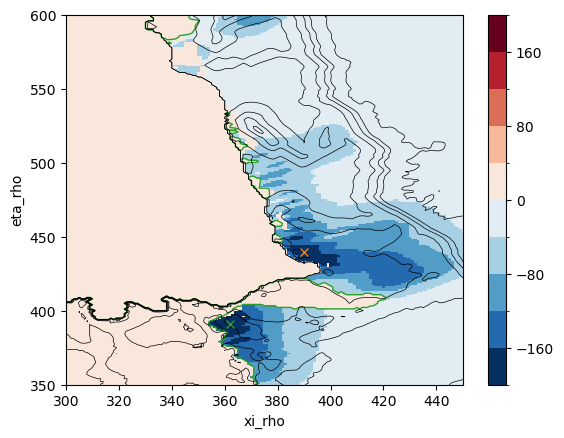

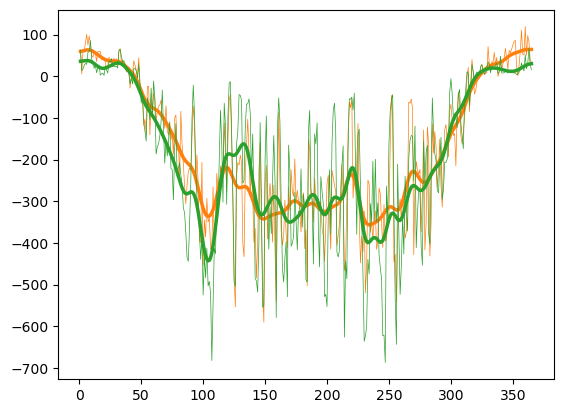

In [15]:
from scipy.ndimage import gaussian_filter1d



# make heat flux plot
(frc.shflux*ds.mask_rho*~ds.mask_zice).mean(dim='shf_time').plot(levels=12)
co1 = plt.contour(ds.zice*ds.mask_rho,levels=(-1,0),colors='C2',linestyles='-',linewidths=1)
co10 = plt.contour(ds.h*ds.mask_rho,levels=(0,1),colors='k',linestyles='-',linewidths=0.5)
co2 = plt.contour(ds.h*ds.mask_rho,levels=(250,500,750,1000,2000),colors='k',linestyles='-',linewidths=0.5)
plt.axis((300,450,350,600))
plt.plot(390,440,'x',color='C1')
plt.plot(362,391,'x',color='C2')

plt.show()

plt.plot(frc.shf_time,frc.shflux.isel(xi_rho=390,eta_rho=440),color='C1',linewidth=.5,label='shflux - CD')
plt.plot(frc.shf_time,gaussian_filter1d(frc.shflux.isel(xi_rho=390,eta_rho=440), 5),color='C1',linewidth=2.5,label='shflux - CD (5-day filter)')
plt.plot(frc.shf_time,frc.shflux.isel(xi_rho=362,eta_rho=391),color='C2',linewidth=.5,label='shflux - Ma')
plt.plot(frc.shf_time,gaussian_filter1d(frc.shflux.isel(xi_rho=362,eta_rho=391), 5),color='C2',linewidth=2.5,label='shflux - Ma (5-day filter)')



In [16]:
# now look at heat coming onto shelf
target_depth = -400

temp400 = grid.transform(ds.temp, 'Z', np.array([target_depth]),target_data=ds.z_rho0,method='linear').squeeze()
# salt400_FM = grid.transform(ds.salt, 'Z', np.array([target_depth]),target_data=ds.z_rho0,method='linear').squeeze()

/g/data/jk72/deg581/miniconda3/envs/devel3.11/lib/python3.11/site-packages/xgcm/grid.py:989: FutureWarning: From version 0.8.0 the Axis computation methods will be removed, in favour of using the Grid computation methods instead. i.e. use `Grid.transform` instead of `Axis.transform`
  warnings.warn(


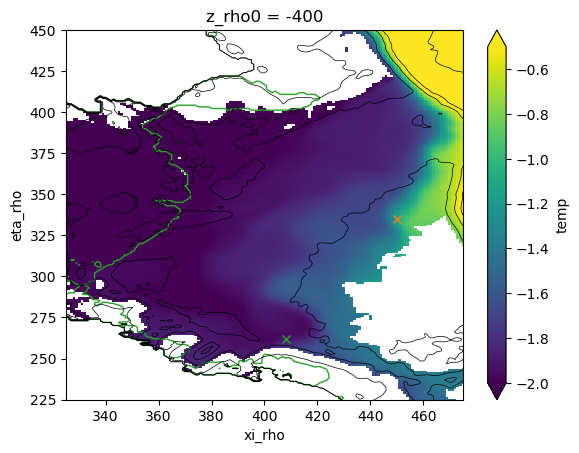

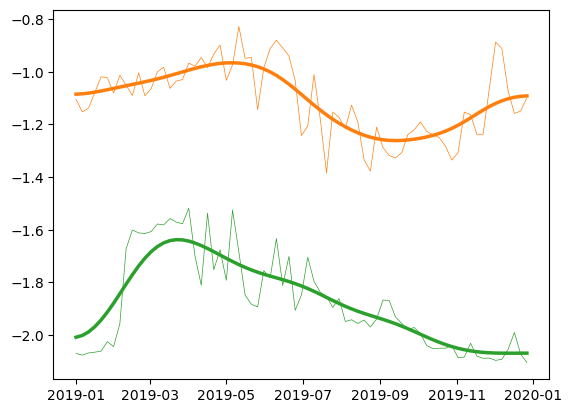

In [17]:
temp400.isel(ocean_time=slice(25,85)).mean(dim='ocean_time').plot(vmin=-2,vmax=-.5)
co1 = plt.contour(ds.zice*ds.mask_rho,levels=(-1,0),colors='C2',linestyles='-',linewidths=1)
co10 = plt.contour(ds.h*ds.mask_rho,levels=(0,1),colors='k',linestyles='-',linewidths=0.5)
co2 = plt.contour(ds.h*ds.mask_rho,levels=(250,500,750,1000,2000),colors='k',linestyles='-',linewidths=0.5)
plt.axis((325,475,225,450))
plt.plot(450,335,'x',color='C1')
plt.plot(408,262,'x',color='C2')
plt.show()

plt.plot(ds.ocean_time,temp400.isel(xi_rho=450,eta_rho=335),color='C1',linewidth=.5,label='400m temp - outer shelf')
plt.plot(ds.ocean_time,gaussian_filter1d(temp400.isel(xi_rho=450,eta_rho=335), 5),color='C1',linewidth=2.5,label='400m temp - outer shelf (5-day filter)')
plt.plot(ds.ocean_time,temp400.isel(xi_rho=408,eta_rho=262),color='C2',linewidth=.5,label='400m temp - coast')
plt.plot(ds.ocean_time,gaussian_filter1d(temp400.isel(xi_rho=408,eta_rho=262), 5),color='C2',linewidth=2.5,label='400m temp - coast (5-day filter)')
plt.show()


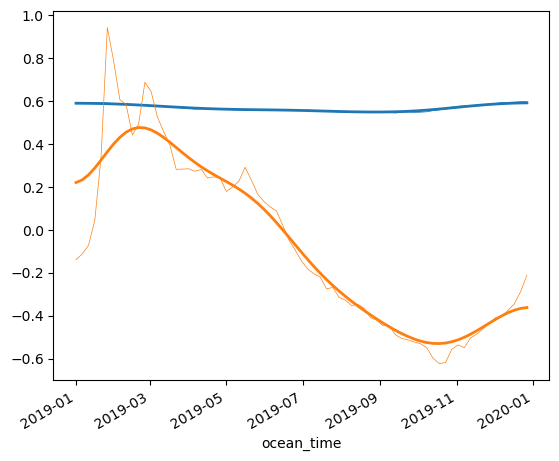

In [18]:
# now melt rate variability
ds['m'] = ds.m.where(ds.m<1e35,np.NaN)
ds['my'] = ds.m*(60*60*24*365)
# ds.my.mean(dim='ocean_time').where(ds.zice<-500).plot(vmin=-10,vmax=10)
# time evolution of melt rate
(ds.my*ds.mask_zice_roi.where(ds.zice<-500).where(ds.mask_zice_roi,np.NaN)).weighted(weights_area).mean(('eta_rho','xi_rho')).plot(color='C0',linewidth=.5,label='mean melt (zice<500m)')
plt.plot(ds.ocean_time,gaussian_filter1d((ds.my*ds.mask_zice_roi.where(ds.zice<-500).where(ds.mask_zice_roi,np.NaN)).weighted(weights_area).mean(('eta_rho','xi_rho')), 5),color='C0',linewidth=2,label='mean melt (zice>500m; 5-day filter)')
(ds.my*ds.mask_zice_roi.where(ds.zice>-500).where(ds.mask_zice_roi,np.NaN)).weighted(weights_area).mean(('eta_rho','xi_rho')).plot(color='C1',linewidth=.5,label='mean melt (zice<500m)')
plt.plot(ds.ocean_time,gaussian_filter1d((ds.my*ds.mask_zice_roi.where(ds.zice>-500).where(ds.mask_zice_roi,np.NaN)).weighted(weights_area).mean(('eta_rho','xi_rho')), 5),color='C1',linewidth=2,label='mean melt (zice>500m; 5-day filter)')

In [19]:
# isw plume strength
import seawater as sw

sigma_0_surf = sw.pden(ds.salt.isel(s_rho=-1).values,sw.temp(ds.salt.isel(s_rho=-1).values,ds.temp.isel(s_rho=-1).values,ds.z_rho0.isel(s_rho=-1).values),ds.z_rho0.isel(s_rho=-1).values,0)-1000
ds['sigma_0_surf']=(('ocean_time','eta_rho','xi_rho'),sigma_0_surf)

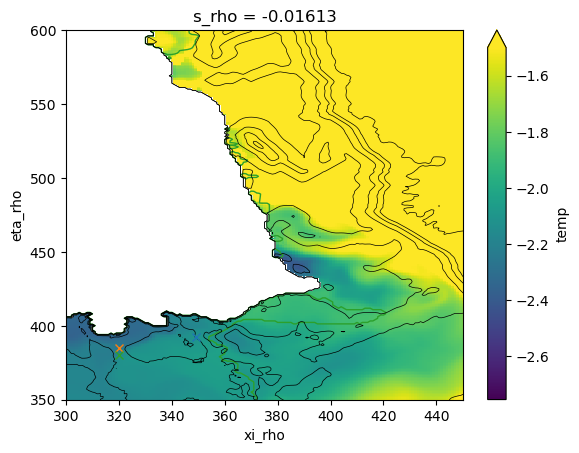

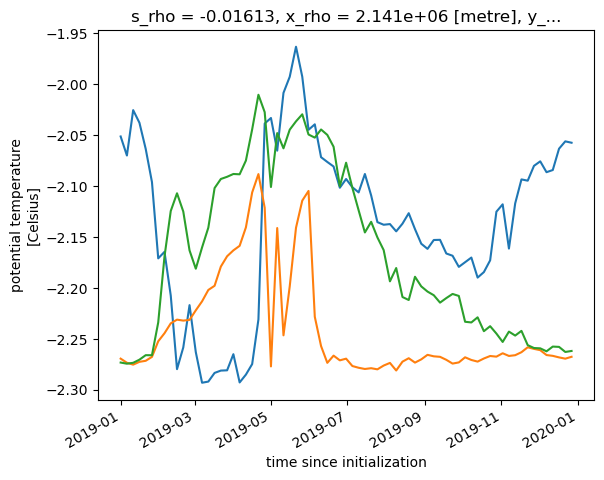

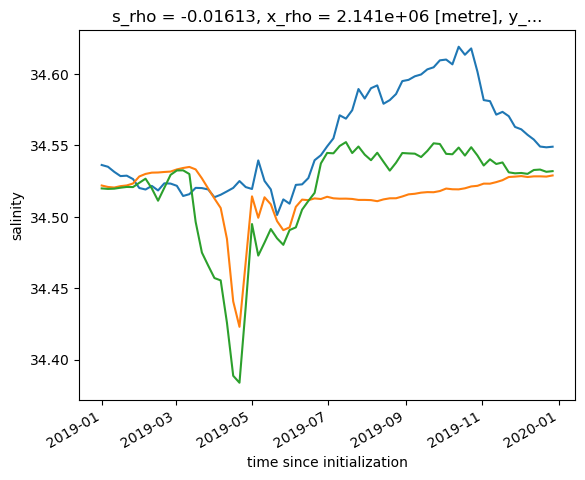

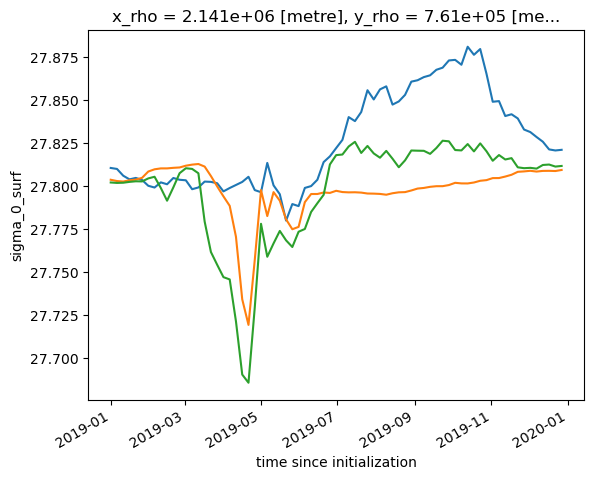

In [20]:



ds.temp.isel(s_rho=-1).isel(ocean_time=slice(25,85)).mean(dim='ocean_time').plot(vmax=-1.5)
co1 = plt.contour(ds.zice*ds.mask_rho,levels=(-1,0),colors='C2',linestyles='-',linewidths=1)
co10 = plt.contour(ds.h*ds.mask_rho,levels=(0,1),colors='k',linestyles='-',linewidths=0.5)
co2 = plt.contour(ds.h*ds.mask_rho,levels=(250,500,750,1000,2000),colors='k',linestyles='-',linewidths=0.5)
plt.axis((300,450,350,600))
plt.plot(349,392,'x',color='C0')
plt.plot(320,385,'x',color='C1')
plt.plot(320,380,'x',color='C2')
plt.show()

# ds.temp.isel(s_rho=-1,xi_rho=390,eta_rho=340).plot()
ds.temp.isel(s_rho=-1,xi_rho=349,eta_rho=392).plot(color='C0')
ds.temp.isel(s_rho=-1,xi_rho=320,eta_rho=385).plot(color='C1')
ds.temp.isel(s_rho=-1,xi_rho=320,eta_rho=380).plot(color='C2')
plt.show()

# ds.salt.isel(s_rho=-1,xi_rho=390,eta_rho=340).plot()
ds.salt.isel(s_rho=-1,xi_rho=349,eta_rho=392).plot(color='C0')
ds.salt.isel(s_rho=-1,xi_rho=320,eta_rho=385).plot(color='C1')
ds.salt.isel(s_rho=-1,xi_rho=320,eta_rho=380).plot(color='C2')
plt.show()


# ds.sigma_0_surf.isel(xi_rho=390,eta_rho=340).plot()
ds.sigma_0_surf.isel(xi_rho=349,eta_rho=392).plot(color='C0')
ds.sigma_0_surf.isel(xi_rho=320,eta_rho=385).plot(color='C1')
ds.sigma_0_surf.isel(xi_rho=320,eta_rho=380).plot(color='C2')
plt.show()

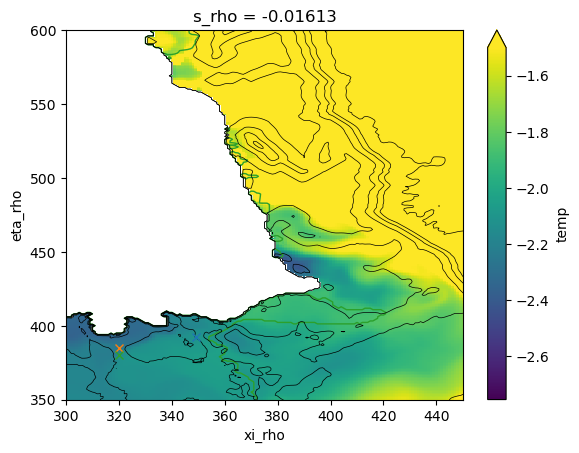

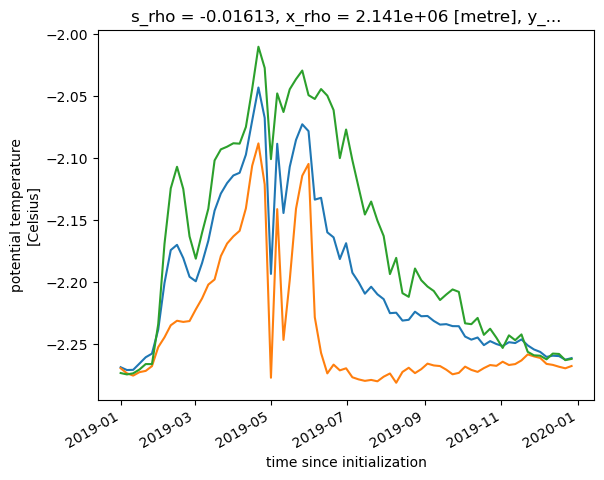

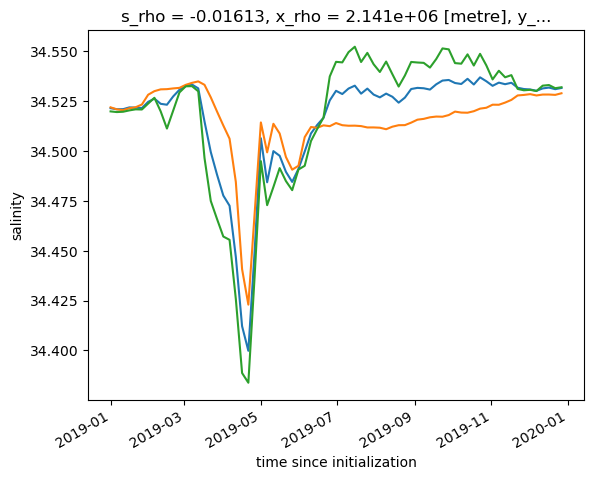

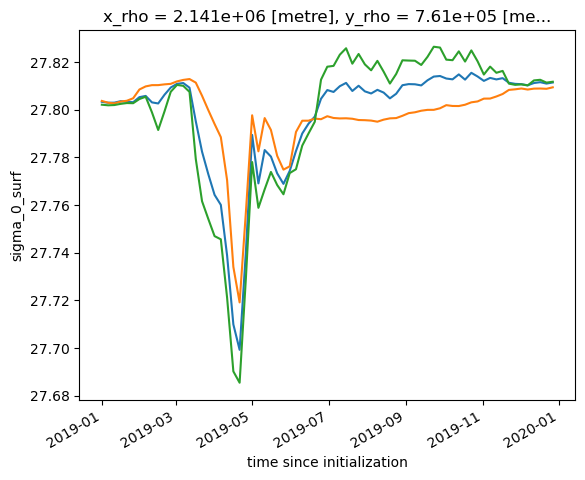

In [21]:
# now make square average of ISW


ds.temp.isel(s_rho=-1).isel(ocean_time=slice(25,85)).mean(dim='ocean_time').plot(vmax=-1.5)
co1 = plt.contour(ds.zice*ds.mask_rho,levels=(-1,0),colors='C2',linestyles='-',linewidths=1)
co10 = plt.contour(ds.h*ds.mask_rho,levels=(0,1),colors='k',linestyles='-',linewidths=0.5)
co2 = plt.contour(ds.h*ds.mask_rho,levels=(250,500,750,1000,2000),colors='k',linestyles='-',linewidths=0.5)
plt.axis((300,450,350,600))
plt.plot(349,392,'x',color='C0')
plt.plot(320,385,'x',color='C1')
plt.plot(320,380,'x',color='C2')
plt.show()

# ds.temp.isel(s_rho=-1,xi_rho=390,eta_rho=340).plot()

mask = np.zeros_like(ds.lon_rho)
mask[380:386,318:323]=1

ds.temp.isel(s_rho=-1).where(mask==1).weighted(weights_area).mean(('eta_rho','xi_rho')).plot(color='C0')
ds.temp.isel(s_rho=-1,xi_rho=320,eta_rho=385).plot(color='C1')
ds.temp.isel(s_rho=-1,xi_rho=320,eta_rho=380).plot(color='C2')
# ds.temp.isel(s_rho=-1,xi_rho=320,eta_rho=385).plot(color='C3')
# ds.temp.isel(s_rho=-1,xi_rho=320,eta_rho=380).plot(color='C4')
plt.show()

# ds.salt.isel(s_rho=-1,xi_rho=390,eta_rho=340).plot()
ds.salt.isel(s_rho=-1).where(mask==1).weighted(weights_area).mean(('eta_rho','xi_rho')).plot(color='C0')
ds.salt.isel(s_rho=-1,xi_rho=320,eta_rho=385).plot(color='C1')
ds.salt.isel(s_rho=-1,xi_rho=320,eta_rho=380).plot(color='C2')
plt.show()


# ds.sigma_0_surf.isel(xi_rho=390,eta_rho=340).plot()
ds.sigma_0_surf.where(mask==1).weighted(weights_area).mean(('eta_rho','xi_rho')).plot(color='C0')
ds.sigma_0_surf.isel(xi_rho=320,eta_rho=385).plot(color='C1')
ds.sigma_0_surf.isel(xi_rho=320,eta_rho=380).plot(color='C2')
plt.show()

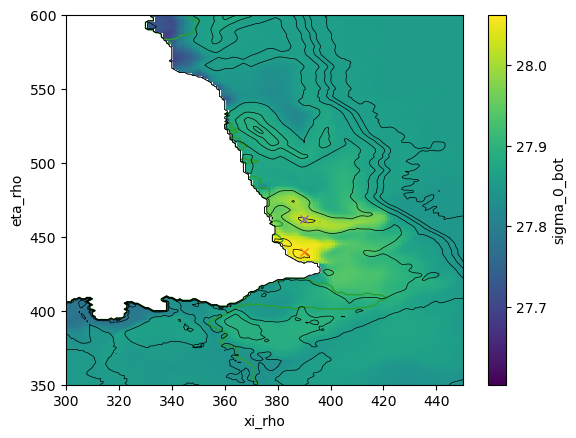

In [22]:
# make pot density ref 0
import seawater as sw



sigma_0_bot = sw.pden(ds.salt.isel(s_rho=0).values,sw.temp(ds.salt.isel(s_rho=0).values,ds.temp.isel(s_rho=0).values,ds.z_rho0.isel(s_rho=0).values),ds.z_rho0.isel(s_rho=0).values,0)-1000
ds['sigma_0_bot']=(('ocean_time','eta_rho','xi_rho'),sigma_0_bot)


ds.sigma_0_bot.mean(dim='ocean_time').plot()
co1 = plt.contour(ds.zice*ds.mask_rho,levels=(-1,0),colors='C2',linestyles='-',linewidths=1)
co10 = plt.contour(ds.h*ds.mask_rho,levels=(0,1),colors='k',linestyles='-',linewidths=0.5)
co2 = plt.contour(ds.h*ds.mask_rho,levels=(250,500,750,1000,2000),colors='k',linestyles='-',linewidths=0.5)
plt.axis((300,450,350,600))
plt.plot(390,440,'x',color='C1')
plt.plot(390,462,'x',color='C4')


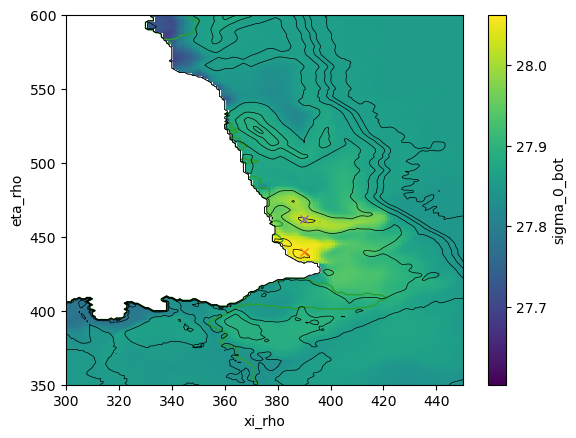

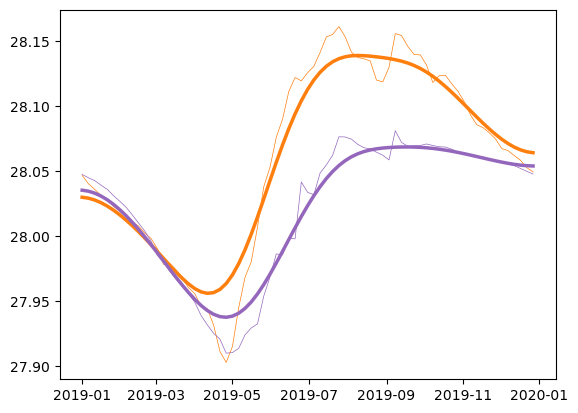

In [23]:
# make DSW density plot



ds.sigma_0_bot.mean(dim='ocean_time').plot()
co1 = plt.contour(ds.zice*ds.mask_rho,levels=(-1,0),colors='C2',linestyles='-',linewidths=1)
co10 = plt.contour(ds.h*ds.mask_rho,levels=(0,1),colors='k',linestyles='-',linewidths=0.5)
co2 = plt.contour(ds.h*ds.mask_rho,levels=(250,500,750,1000,2000),colors='k',linestyles='-',linewidths=0.5)
plt.axis((300,450,350,600))
plt.plot(390,440,'x',color='C1')
plt.plot(390,462,'x',color='C4')

plt.show()

plt.plot(ds.ocean_time,ds.sigma_0_bot.isel(xi_rho=390,eta_rho=440),color='C1',linewidth=.5,label='$\sigma_0$ - CD')
plt.plot(ds.ocean_time,gaussian_filter1d(ds.sigma_0_bot.isel(xi_rho=390,eta_rho=440), 5),color='C1',linewidth=2.5,label='$\sigma_0$ - CD (5-day filter)')
plt.plot(ds.ocean_time,ds.sigma_0_bot.isel(xi_rho=390,eta_rho=462),color='C4',linewidth=.5,label='$\sigma_0$ - BB')
plt.plot(ds.ocean_time,gaussian_filter1d(ds.sigma_0_bot.isel(xi_rho=390,eta_rho=462), 5),color='C4',linewidth=2.5,label='$\sigma_0$ - BB (5-day filter)')

<Figure size 640x480 with 0 Axes>

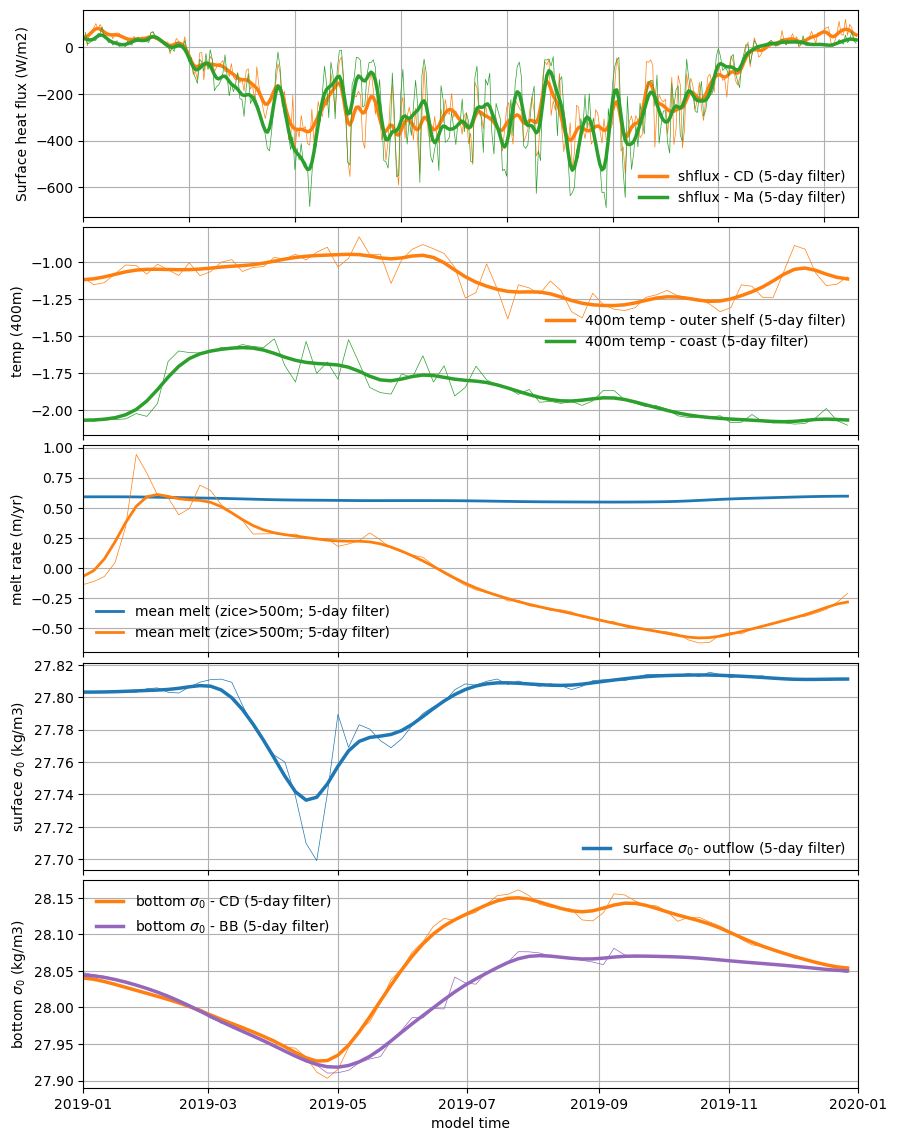

In [41]:
# compile together into single plot



gs = gridspec.GridSpec(nrows=5,ncols=1,wspace=0.1, hspace=0.05)
plt.cla()
plt.clf()
fig = plt.figure(figsize=[10,14])
ax = None


ax=fig.add_subplot(gs[0,0])

ax.plot(frc.shf_time,frc.shflux.isel(xi_rho=390,eta_rho=440),color='C1',linewidth=.5)
ax.plot(frc.shf_time,gaussian_filter1d(frc.shflux.isel(xi_rho=390,eta_rho=440), 2),color='C1',linewidth=2.5,label='shflux - CD (5-day filter)')
ax.plot(frc.shf_time,frc.shflux.isel(xi_rho=362,eta_rho=391),color='C2',linewidth=.5)
ax.plot(frc.shf_time,gaussian_filter1d(frc.shflux.isel(xi_rho=362,eta_rho=391), 2),color='C2',linewidth=2.5,label='shflux - Ma (5-day filter)')
ax.set_xlim(0,366)
ax.set_ylabel('Surface heat flux (W/m2)')
ax.set_xticklabels([])
ax.set_title('')
ax.grid()
ax.legend(frameon=False)


ax=fig.add_subplot(gs[1,0])
ax.plot(ds.ocean_time,temp400.isel(xi_rho=450,eta_rho=335),color='C1',linewidth=.5)
ax.plot(ds.ocean_time,gaussian_filter1d(temp400.isel(xi_rho=450,eta_rho=335), 2),color='C1',linewidth=2.5,label='400m temp - outer shelf (5-day filter)')
ax.plot(ds.ocean_time,temp400.isel(xi_rho=408,eta_rho=262),color='C2',linewidth=.5)
ax.plot(ds.ocean_time,gaussian_filter1d(temp400.isel(xi_rho=408,eta_rho=262), 2),color='C2',linewidth=2.5,label='400m temp - coast (5-day filter)')
ax.set_xlim((np.datetime64('2019-01-01'),np.datetime64('2020-01-01')))
ax.set_ylabel('temp (400m)')
ax.set_xticklabels([])
ax.set_title('')
ax.grid()
ax.legend(frameon=False)

ax=fig.add_subplot(gs[2,0])
(ds.my*ds.mask_zice_roi.where(ds.zice<-500).where(ds.mask_zice_roi,np.NaN)).weighted(weights_area).mean(('eta_rho','xi_rho')).plot(color='C0',linewidth=.5)
plt.plot(ds.ocean_time,gaussian_filter1d((ds.my*ds.mask_zice_roi.where(ds.zice<-500).where(ds.mask_zice_roi,np.NaN)).weighted(weights_area).mean(('eta_rho','xi_rho')), 2),color='C0',linewidth=2,label='mean melt (zice>500m; 5-day filter)')
(ds.my*ds.mask_zice_roi.where(ds.zice>-500).where(ds.mask_zice_roi,np.NaN)).weighted(weights_area).mean(('eta_rho','xi_rho')).plot(color='C1',linewidth=.5)
plt.plot(ds.ocean_time,gaussian_filter1d((ds.my*ds.mask_zice_roi.where(ds.zice>-500).where(ds.mask_zice_roi,np.NaN)).weighted(weights_area).mean(('eta_rho','xi_rho')), 2),color='C1',linewidth=2,label='mean melt (zice>500m; 5-day filter)')
ax.set_xlim((np.datetime64('2019-01-01'),np.datetime64('2020-01-01')))
ax.set_ylabel('melt rate (m/yr)')
ax.set_xticklabels([])
ax.set_title('')
ax.grid()
ax.legend(frameon=False)

ax=fig.add_subplot(gs[3,0])
mask = np.zeros_like(ds.lon_rho)
mask[380:386,318:323]=1
ax.plot(ds.ocean_time,ds.sigma_0_surf.where(mask==1).weighted(weights_area).mean(('eta_rho','xi_rho')),color='C0',linewidth=.5)
ax.plot(ds.ocean_time,gaussian_filter1d(ds.sigma_0_surf.where(mask==1).weighted(weights_area).mean(('eta_rho','xi_rho')),2),color='C0',linewidth=2.5,label='surface $\sigma_0$- outflow (5-day filter)')
ax.set_xlim((np.datetime64('2019-01-01'),np.datetime64('2020-01-01')))
ax.set_ylabel('surface $\sigma_0$ (kg/m3)')
ax.set_xticklabels([])
ax.set_title('')
ax.grid()
ax.legend(frameon=False)

ax=fig.add_subplot(gs[4,0])
ax.plot(ds.ocean_time,ds.sigma_0_bot.isel(xi_rho=390,eta_rho=440),color='C1',linewidth=.5)
ax.plot(ds.ocean_time,gaussian_filter1d(ds.sigma_0_bot.isel(xi_rho=390,eta_rho=440), 2),color='C1',linewidth=2.5,label='bottom $\sigma_0$ - CD (5-day filter)')
ax.plot(ds.ocean_time,ds.sigma_0_bot.isel(xi_rho=390,eta_rho=462),color='C4',linewidth=.5)
ax.plot(ds.ocean_time,gaussian_filter1d(ds.sigma_0_bot.isel(xi_rho=390,eta_rho=462), 2),color='C4',linewidth=2.5,label='bottom $\sigma_0$ - BB (5-day filter)')
ax.set_xlim((np.datetime64('2019-01-01'),np.datetime64('2020-01-01')))
ax.set_xlabel('model time')
ax.set_ylabel('bottom $\sigma_0$ (kg/m3)')
# ax.set_xticklabels([])
ax.set_title('')
ax.grid()
ax.legend(frameon=False)


In [25]:
# import seawater as sw
# print(sw.pden(34.877117,sw.temp(34.877117,-2.650027,-243.0673248933187),-243.0673248933187,0))

# print(sw.pden(34.658474,sw.temp(34.658474,-1.3651043,-980.7894390319248),-980.7894390319248,0))


In [26]:
# ds.salt.isel(s_rho=0).isel(xi_rho=390,eta_rho=440).plot()
# plt.show()
# ds.temp.isel(s_rho=0).isel(xi_rho=393,eta_rho=460).plot()
# plt.show()
# ds.rho.isel(s_rho=0).isel(xi_rho=393,eta_rho=460).plot()


In [27]:
# ds.temp.isel(s_rho=0).isel(ocean_time=slice(5,18)).mean(dim='ocean_time').plot()
# plt.show()
# ds.temp.isel(s_rho=0).isel(ocean_time=slice(55,85)).mean(dim='ocean_time').plot()


Text(0, 0.5, 'salinity')

<Figure size 640x480 with 0 Axes>

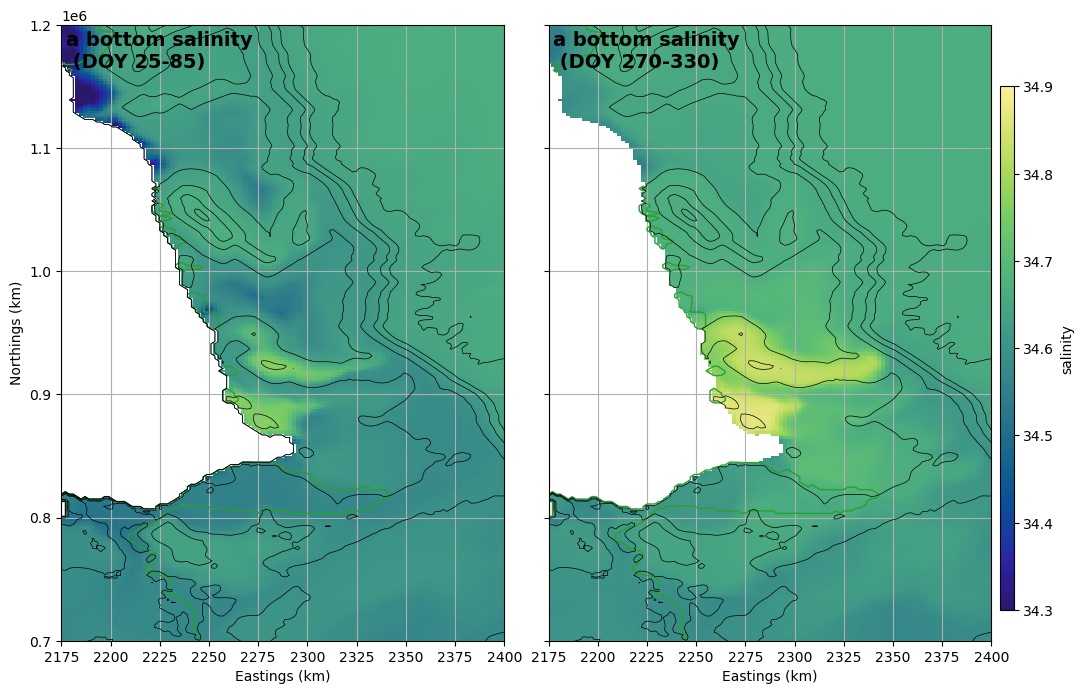

In [28]:


gs = gridspec.GridSpec(nrows=1,ncols=2,wspace=0.1, hspace=0.05)
plt.cla()
plt.clf()
fig = plt.figure(figsize=[12,8])
ax = None

ax=fig.add_subplot(gs[0,0])
im = ds.salt.isel(s_rho=0).isel(ocean_time=slice(5,18)).mean(dim='ocean_time').plot(x='x_rho',y='y_rho',cmap='cmo.haline',add_colorbar=False,vmin=34.3,vmax=34.9)
co1 = ax.contour(ds.x_rho,ds.y_rho,ds.zice*ds.mask_rho,levels=(-1,0),colors='C2',linestyles='-',linewidths=1)
co10 = ax.contour(ds.x_rho,ds.y_rho,ds.h*ds.mask_rho,levels=(0,1),colors='k',linestyles='-',linewidths=0.5)
co2 = ax.contour(ds.x_rho,ds.y_rho,ds.h*ds.mask_rho,levels=(250,500,750,1000,2000),colors='k',linestyles='-',linewidths=0.5)
ax.set_xlim((2.175e6,2.4e6))
ax.set_ylim((.7e6,1.2e6))
ax.text(0.01, 0.99, 'a bottom salinity\n (DOY 25-85)', transform=ax.transAxes,fontsize=14, fontweight='bold', va='top')
ax.grid()
scale_ticks = 1e3
ticks_x = mticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/scale_ticks))
ax.xaxis.set_major_formatter(ticks_x)
ax.set_ylabel('Northings (km)')
ax.set_xlabel('Eastings (km)')
# ax.set_yticklabels([])
ax.set_title('')


ax=fig.add_subplot(gs[0,1])
im = ds.salt.isel(s_rho=0).isel(ocean_time=slice(55,85)).mean(dim='ocean_time').plot(x='x_rho',y='y_rho',cmap='cmo.haline',add_colorbar=False,vmin=34.3,vmax=34.9)
co1 = ax.contour(ds.x_rho,ds.y_rho,ds.zice*ds.mask_rho,levels=(-1,0),colors='C2',linestyles='-',linewidths=1)
co2 = ax.contour(ds.x_rho,ds.y_rho,ds.h*ds.mask_rho,levels=(250,500,750,1000,2000),colors='k',linestyles='-',linewidths=0.5)
ax.set_xlim((2.175e6,2.4e6))
ax.set_ylim((.7e6,1.2e6))
ax.text(0.01, 0.99, 'a bottom salinity\n (DOY 270-330)', transform=ax.transAxes,fontsize=14, fontweight='bold', va='top')
ax.grid()
scale_ticks = 1e3
ticks_x = mticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/scale_ticks))
ax.xaxis.set_major_formatter(ticks_x)
ax.set_ylabel('')
ax.set_xlabel('Eastings (km)')
ax.set_yticklabels([])
ax.set_title('')




cax = inset_axes(ax,
                width="1.5%",  # width = 10% of parent_bbox width
                height="85%",  # height : 50%
                loc='lower left',
                bbox_to_anchor=(1.02,.05, 2, 1),
                bbox_transform=ax.transAxes,
                borderpad=0,
                )
cbar = fig.colorbar(im, cax=cax, orientation='vertical') 
cax.set_ylabel(r'salinity')

Text(0, 0.5, 'density anomaly (kg/m3)')

<Figure size 640x480 with 0 Axes>

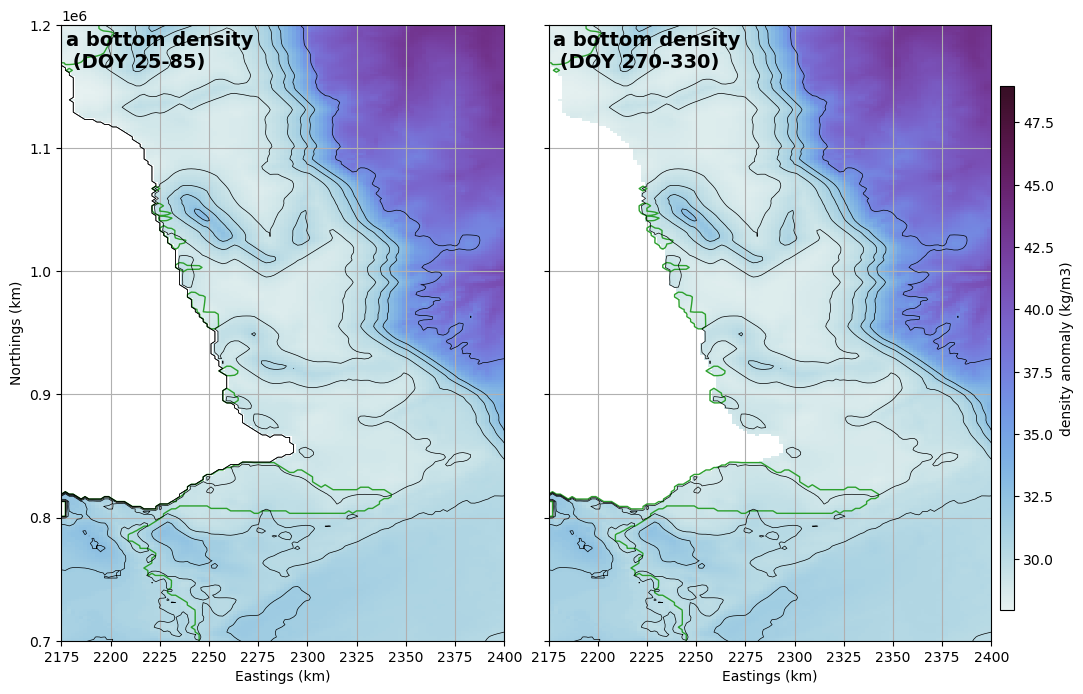

In [29]:


gs = gridspec.GridSpec(nrows=1,ncols=2,wspace=0.1, hspace=0.05)
plt.cla()
plt.clf()
fig = plt.figure(figsize=[12,8])
ax = None

ax=fig.add_subplot(gs[0,0])
im = ds.rho.isel(s_rho=0).isel(ocean_time=slice(5,18)).mean(dim='ocean_time').plot(x='x_rho',y='y_rho',cmap='cmo.dense',add_colorbar=False)
co1 = ax.contour(ds.x_rho,ds.y_rho,ds.zice*ds.mask_rho,levels=(-1,0),colors='C2',linestyles='-',linewidths=1)
co10 = ax.contour(ds.x_rho,ds.y_rho,ds.h*ds.mask_rho,levels=(0,1),colors='k',linestyles='-',linewidths=0.5)
co2 = ax.contour(ds.x_rho,ds.y_rho,ds.h*ds.mask_rho,levels=(250,500,750,1000,2000),colors='k',linestyles='-',linewidths=0.5)
ax.set_xlim((2.175e6,2.4e6))
ax.set_ylim((.7e6,1.2e6))
ax.text(0.01, 0.99, 'a bottom density\n (DOY 25-85)', transform=ax.transAxes,fontsize=14, fontweight='bold', va='top')
ax.grid()
scale_ticks = 1e3
ticks_x = mticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/scale_ticks))
ax.xaxis.set_major_formatter(ticks_x)
ax.set_ylabel('Northings (km)')
ax.set_xlabel('Eastings (km)')
# ax.set_yticklabels([])
ax.set_title('')


ax=fig.add_subplot(gs[0,1])
im = ds.rho.isel(s_rho=0).isel(ocean_time=slice(55,85)).mean(dim='ocean_time').plot(x='x_rho',y='y_rho',cmap='cmo.dense',add_colorbar=False)
co1 = ax.contour(ds.x_rho,ds.y_rho,ds.zice*ds.mask_rho,levels=(-1,0),colors='C2',linestyles='-',linewidths=1)
co2 = ax.contour(ds.x_rho,ds.y_rho,ds.h*ds.mask_rho,levels=(250,500,750,1000,2000),colors='k',linestyles='-',linewidths=0.5)
ax.set_xlim((2.175e6,2.4e6))
ax.set_ylim((.7e6,1.2e6))
ax.text(0.01, 0.99, 'a bottom density\n (DOY 270-330)', transform=ax.transAxes,fontsize=14, fontweight='bold', va='top')
ax.grid()
scale_ticks = 1e3
ticks_x = mticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/scale_ticks))
ax.xaxis.set_major_formatter(ticks_x)
ax.set_ylabel('')
ax.set_xlabel('Eastings (km)')
ax.set_yticklabels([])
ax.set_title('')




cax = inset_axes(ax,
                width="1.5%",  # width = 10% of parent_bbox width
                height="85%",  # height : 50%
                loc='lower left',
                bbox_to_anchor=(1.02,.05, 2, 1),
                bbox_transform=ax.transAxes,
                borderpad=0,
                )
cbar = fig.colorbar(im, cax=cax, orientation='vertical') 
cax.set_ylabel(r'density anomaly (kg/m3)')

In [30]:
# calculate the potential density anomaly ref to 0

import seawater as sw

sigma_0_5_18 = sw.pden(ds.salt.isel(s_rho=0).isel(ocean_time=slice(5,18)).mean(dim='ocean_time').values,sw.temp(ds.salt.isel(s_rho=0).isel(ocean_time=slice(5,18)).mean(dim='ocean_time').values,ds.temp.isel(s_rho=0).isel(ocean_time=slice(5,18)).mean(dim='ocean_time').values,ds.z_rho0.isel(s_rho=0).values),ds.z_rho0.isel(s_rho=0).values,0)-1000

sigma_0_55_67 = sw.pden(ds.salt.isel(s_rho=0).isel(ocean_time=slice(55,67)).mean(dim='ocean_time').values,sw.temp(ds.salt.isel(s_rho=0).isel(ocean_time=slice(55,67)).mean(dim='ocean_time').values,ds.temp.isel(s_rho=0).isel(ocean_time=slice(55,67)).mean(dim='ocean_time').values,ds.z_rho0.isel(s_rho=0).values),ds.z_rho0.isel(s_rho=0).values,0)-1000



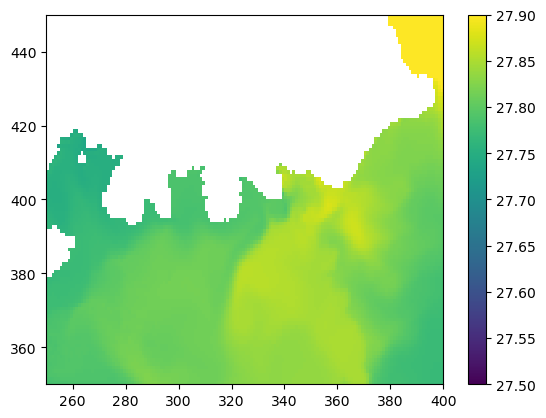

In [31]:
plt.pcolormesh(sw.pden(ds.salt.isel(s_rho=-1).isel(ocean_time=slice(55,67)).mean(dim='ocean_time').values,sw.temp(ds.salt.isel(s_rho=0).isel(ocean_time=slice(55,67)).mean(dim='ocean_time').values,ds.temp.isel(s_rho=0).isel(ocean_time=slice(55,67)).mean(dim='ocean_time').values,ds.z_rho0.isel(s_rho=0-1).values),ds.z_rho0.isel(s_rho=-1).values,0)-1000)
plt.colorbar()
plt.axis((250,400,350,450))
plt.clim((27.5,27.9))

Text(0.5, 0, 'potential density anomaly (kg/m3)')

<Figure size 640x480 with 0 Axes>

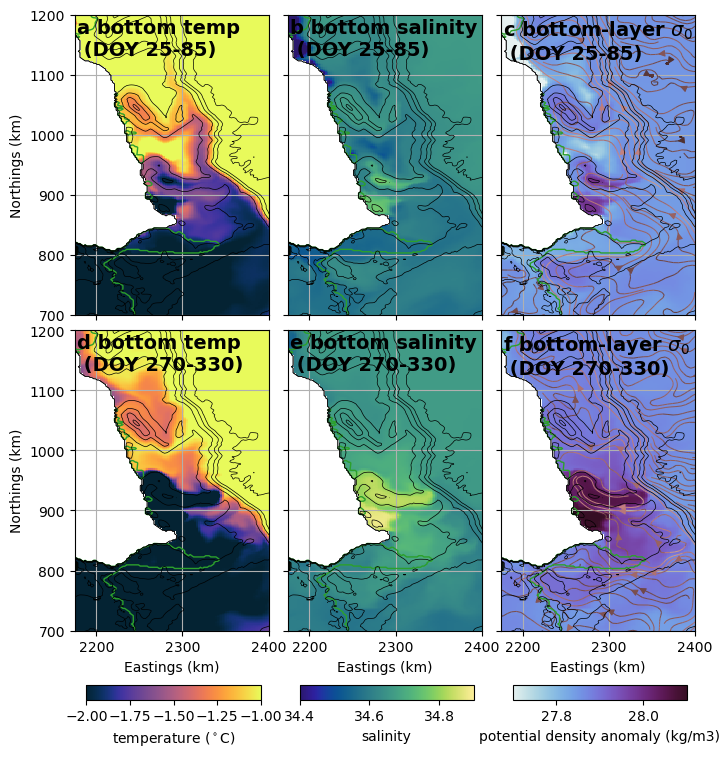

In [32]:


gs = gridspec.GridSpec(nrows=2,ncols=3,wspace=0.1, hspace=0.05)
plt.cla()
plt.clf()
fig = plt.figure(figsize=[8,8])
ax = None


ax=fig.add_subplot(gs[0,0])
im = ds.temp.isel(s_rho=0).isel(ocean_time=slice(5,18)).mean(dim='ocean_time').plot(x='x_rho',y='y_rho',cmap='cmo.thermal',add_colorbar=False,vmin=-2,vmax=-1.)
co1 = ax.contour(ds.x_rho,ds.y_rho,ds.zice*ds.mask_rho,levels=(-1,0),colors='C2',linestyles='-',linewidths=1)
co10 = ax.contour(ds.x_rho,ds.y_rho,ds.h*ds.mask_rho,levels=(0,1),colors='k',linestyles='-',linewidths=0.5)
co2 = ax.contour(ds.x_rho,ds.y_rho,ds.h*ds.mask_rho,levels=(250,500,750,1000,2000),colors='k',linestyles='-',linewidths=0.5)
ax.set_xlim((2.175e6,2.4e6))
ax.set_ylim((.7e6,1.2e6))
ax.text(0.01, 0.99, 'a bottom temp\n (DOY 25-85)', transform=ax.transAxes,fontsize=14, fontweight='bold', va='top')
ax.grid()
scale_ticks = 1e3
ticks_x = mticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/scale_ticks))
ax.xaxis.set_major_formatter(ticks_x)
ticks_y = mticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/scale_ticks))
ax.yaxis.set_major_formatter(ticks_y)
ax.set_ylabel('Northings (km)')
# ax.set_xlabel('Eastings (km)')
# ax.set_yticklabels([])
ax.set_xticklabels([])
ax.set_title('')


ax=fig.add_subplot(gs[0,1])
im = ds.salt.isel(s_rho=0).isel(ocean_time=slice(5,18)).mean(dim='ocean_time').plot(x='x_rho',y='y_rho',cmap='cmo.haline',add_colorbar=False,vmin=34.4,vmax=34.9)
co1 = ax.contour(ds.x_rho,ds.y_rho,ds.zice*ds.mask_rho,levels=(-1,0),colors='C2',linestyles='-',linewidths=1)
co10 = ax.contour(ds.x_rho,ds.y_rho,ds.h*ds.mask_rho,levels=(0,1),colors='k',linestyles='-',linewidths=0.5)
co2 = ax.contour(ds.x_rho,ds.y_rho,ds.h*ds.mask_rho,levels=(250,500,750,1000,2000),colors='k',linestyles='-',linewidths=0.5)
ax.set_xlim((2.175e6,2.4e6))
ax.set_ylim((.7e6,1.2e6))
ax.text(0.01, 0.99, 'b bottom salinity\n (DOY 25-85)', transform=ax.transAxes,fontsize=14, fontweight='bold', va='top')
ax.grid()
scale_ticks = 1e3
ticks_x = mticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/scale_ticks))
ax.xaxis.set_major_formatter(ticks_x)
ticks_y = mticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/scale_ticks))
ax.yaxis.set_major_formatter(ticks_y)
# ax.set_xlabel('Eastings (km)')
ax.set_ylabel('')
ax.set_xlabel('')
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.set_title('')

ax=fig.add_subplot(gs[0,2])
uvel=ds.u_rho.isel(s_rho=-2).isel(ocean_time=slice(5,18)).mean(dim='ocean_time')
vvel=ds.v_rho.isel(s_rho=-2).isel(ocean_time=slice(5,18)).mean(dim='ocean_time')
vel_mag = np.sqrt(uvel**2+vvel**2).squeeze()**0.5
str_kwargs = {"color":vel_mag.values,
              "linewidth":.75,
              "arrowsize":1,
              "density":10,
              "cmap":"pink"}
im = plt.pcolormesh(ds.x_rho,ds.y_rho,sigma_0_5_18,cmap='cmo.dense',vmin=27.7,vmax=28.1)
# im = ds.rho.isel(s_rho=0).isel(ocean_time=slice(5,18)).mean(dim='ocean_time').plot(x='x_rho',y='y_rho',cmap='cmo.dense',add_colorbar=False,vmin=29,vmax=34)
st = ax.streamplot(ds.x_rho.values, ds.y_rho.values, uvel.values, vvel.values,**str_kwargs)
co1 = ax.contour(ds.x_rho,ds.y_rho,ds.zice*ds.mask_rho,levels=(-1,0),colors='C2',linestyles='-',linewidths=1)
co10 = ax.contour(ds.x_rho,ds.y_rho,ds.h*ds.mask_rho,levels=(0,1),colors='k',linestyles='-',linewidths=0.5)
co2 = ax.contour(ds.x_rho,ds.y_rho,ds.h*ds.mask_rho,levels=(250,500,750,1000,2000),colors='k',linestyles='-',linewidths=0.5)
ax.set_xlim((2.175e6,2.4e6))
ax.set_ylim((.7e6,1.2e6))
ax.text(0.01, 0.99, 'c bottom-layer $\sigma_0$ \n (DOY 25-85)', transform=ax.transAxes,fontsize=14, fontweight='bold', va='top')
ax.grid()
scale_ticks = 1e3
ticks_x = mticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/scale_ticks))
ax.xaxis.set_major_formatter(ticks_x)
ticks_y = mticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/scale_ticks))
ax.yaxis.set_major_formatter(ticks_y)
ax.set_ylabel('')
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.set_title('')




ax=fig.add_subplot(gs[1,0])
im = ds.temp.isel(s_rho=0).isel(ocean_time=slice(55,67)).mean(dim='ocean_time').plot(x='x_rho',y='y_rho',cmap='cmo.thermal',add_colorbar=False,vmin=-2,vmax=-1)
co1 = ax.contour(ds.x_rho,ds.y_rho,ds.zice*ds.mask_rho,levels=(-1,0),colors='C2',linestyles='-',linewidths=1)
co10 = ax.contour(ds.x_rho,ds.y_rho,ds.h*ds.mask_rho,levels=(0,1),colors='k',linestyles='-',linewidths=0.5)
co2 = ax.contour(ds.x_rho,ds.y_rho,ds.h*ds.mask_rho,levels=(250,500,750,1000,2000),colors='k',linestyles='-',linewidths=0.5)
ax.set_xlim((2.175e6,2.4e6))
ax.set_ylim((.7e6,1.2e6))
ax.text(0.01, 0.99, 'd bottom temp\n (DOY 270-330)', transform=ax.transAxes,fontsize=14, fontweight='bold', va='top')
ax.grid()
scale_ticks = 1e3
ticks_x = mticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/scale_ticks))
ax.xaxis.set_major_formatter(ticks_x)
ticks_y = mticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/scale_ticks))
ax.yaxis.set_major_formatter(ticks_y)
ax.set_ylabel('Northings (km)')
ax.set_xlabel('Eastings (km)')
# ax.set_yticklabels([])
ax.set_title('')


cax = inset_axes(ax,
                width="45%",  # width = 10% of parent_bbox width
                height="5%",  # height : 50%
                loc='lower left',
                bbox_to_anchor=(.06,-.23, 2, 1),
                bbox_transform=ax.transAxes,
                borderpad=0,
                )
cbar = fig.colorbar(im, cax=cax, orientation='horizontal') 
cax.set_xlabel(r'temperature ($^\circ$C)')


ax=fig.add_subplot(gs[1,1])
im = ds.salt.isel(s_rho=0).isel(ocean_time=slice(55,67)).mean(dim='ocean_time').plot(x='x_rho',y='y_rho',cmap='cmo.haline',add_colorbar=False,vmin=34.4,vmax=34.9)
co1 = ax.contour(ds.x_rho,ds.y_rho,ds.zice*ds.mask_rho,levels=(-1,0),colors='C2',linestyles='-',linewidths=1)
co10 = ax.contour(ds.x_rho,ds.y_rho,ds.h*ds.mask_rho,levels=(0,1),colors='k',linestyles='-',linewidths=0.5)
co2 = ax.contour(ds.x_rho,ds.y_rho,ds.h*ds.mask_rho,levels=(250,500,750,1000,2000),colors='k',linestyles='-',linewidths=0.5)
ax.set_xlim((2.175e6,2.4e6))
ax.set_ylim((.7e6,1.2e6))
ax.text(0.01, 0.99, 'e bottom salinity\n (DOY 270-330)', transform=ax.transAxes,fontsize=14, fontweight='bold', va='top')
ax.grid()
scale_ticks = 1e3
ticks_x = mticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/scale_ticks))
ax.xaxis.set_major_formatter(ticks_x)
ticks_y = mticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/scale_ticks))
ax.yaxis.set_major_formatter(ticks_y)
ax.set_ylabel('')
ax.set_xlabel('Eastings (km)')
ax.set_yticklabels([])
ax.set_title('')


cax = inset_axes(ax,
                width="45%",  # width = 10% of parent_bbox width
                height="5%",  # height : 50%
                loc='lower left',
                bbox_to_anchor=(.06,-.23, 2, 1),
                bbox_transform=ax.transAxes,
                borderpad=0,
                )
cbar = fig.colorbar(im, cax=cax, orientation='horizontal') 
cax.set_xlabel(r'salinity')

uvel=ds.u_rho.isel(s_rho=-2).isel(ocean_time=slice(55,67)).mean(dim='ocean_time')
vvel=ds.v_rho.isel(s_rho=-2).isel(ocean_time=slice(55,67)).mean(dim='ocean_time')
vel_mag = np.sqrt(uvel**2+vvel**2).squeeze()**0.5
str_kwargs = {"color":vel_mag.values,
              "linewidth":.75,
              "arrowsize":1,
              "density":10,
              "cmap":"pink"}
ax=fig.add_subplot(gs[1,2])
im = plt.pcolormesh(ds.x_rho,ds.y_rho,sigma_0_55_67,cmap='cmo.dense',vmin=27.7,vmax=28.1)
# im = ds.rho.isel(s_rho=0).isel(ocean_time=slice(55,67)).mean(dim='ocean_time').plot(x='x_rho',y='y_rho',cmap='cmo.dense',add_colorbar=False,vmin=29,vmax=34)
st = ax.streamplot(ds.x_rho.values, ds.y_rho.values, uvel.values, vvel.values,**str_kwargs)
co1 = ax.contour(ds.x_rho,ds.y_rho,ds.zice*ds.mask_rho,levels=(-1,0),colors='C2',linestyles='-',linewidths=1)
co10 = ax.contour(ds.x_rho,ds.y_rho,ds.h*ds.mask_rho,levels=(0,1),colors='k',linestyles='-',linewidths=0.5)
co2 = ax.contour(ds.x_rho,ds.y_rho,ds.h*ds.mask_rho,levels=(250,500,750,1000,2000),colors='k',linestyles='-',linewidths=0.5)
ax.set_xlim((2.175e6,2.4e6))
ax.set_ylim((.7e6,1.2e6))
ax.text(0.01, 0.99, 'f bottom-layer $\sigma_0$ \n (DOY 270-330)', transform=ax.transAxes,fontsize=14, fontweight='bold', va='top')
ax.grid()
scale_ticks = 1e3
ticks_x = mticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/scale_ticks))
ax.xaxis.set_major_formatter(ticks_x)
ticks_y = mticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/scale_ticks))
ax.yaxis.set_major_formatter(ticks_y)
ax.set_ylabel('')
ax.set_xlabel('Eastings (km)')
ax.set_yticklabels([])
ax.set_title('')


cax = inset_axes(ax,
                width="45%",  # width = 10% of parent_bbox width
                height="5%",  # height : 50%
                loc='lower left',
                bbox_to_anchor=(.06,-.23, 2, 1),
                bbox_transform=ax.transAxes,
                borderpad=0,
                )
cbar = fig.colorbar(im, cax=cax, orientation='horizontal') 
cax.set_xlabel(r'potential density anomaly (kg/m3)')

In [33]:
STOP

NameError: name 'STOP' is not defined

In [ ]:
# min_eta=363
# fig,axes=plt.subplots(nrows=2,figsize=(8,5),sharex=True)
# ax=axes[0]
# im=(ds.temp).isel(ocean_time=slice(5,18)).mean(dim='ocean_time').isel(eta_rho=min_eta).plot(ax=ax,x='x_rho',y='z_rho0',cmap='cmo.thermal',vmin=-2.4,vmax=-.5)
# ax.set_xlim((1.7e6,2.47e6))
# ax.set_ylim((-2800,-10))
# ax.set_xlabel('')
# ax.grid()

# ax=axes[1]
# im=(ds.temp).isel(ocean_time=slice(55,67)).mean(dim='ocean_time').isel(eta_rho=min_eta).plot(ax=ax,x='x_rho',y='z_rho0',cmap='cmo.thermal',vmin=-2.4,vmax=-.5)
# ax.set_xlim((1.7e6,2.47e6))
# ax.set_ylim((-2800,-10))
# ax.grid()
# ax.set_xlabel('Eastings (m PSG-71)')
# plt.show()

# # im=(ds.temp).isel(ocean_time=slice(5,18)).isel(s_rho=-1).mean(dim='ocean_time').plot(cmap='cmo.thermal',vmin=-2.5,vmax=.5)
# # (ds.zice*ds.mask_rho).plot.contour(levels=[-1,0],colors='C1',linewidths=1)

# # plt.axhline(y=min_eta)
# # plt.plot(min_xi,min_eta,'x')
# # plt.show()

In [ ]:
# # make 400m transects
# target_depth = -400

# target_time = slice(5,18)
# temp400_FM = grid.transform(ds.temp.isel(ocean_time=target_time).mean(dim='ocean_time'), 'Z', np.array([target_depth]),target_data=ds.z_rho0,method='linear').squeeze()
# salt400_FM = grid.transform(ds.salt.isel(ocean_time=target_time).mean(dim='ocean_time'), 'Z', np.array([target_depth]),target_data=ds.z_rho0,method='linear').squeeze()
# # ur400_FM = grid.transform(ds.u_rho.isel(ocean_time=target_time).mean(dim='ocean_time'), 'Z', np.array([target_depth]),target_data=ds.z_rho0,method='linear').squeeze()
# # vr400_FM = grid.transform(ds.v_rho.isel(ocean_time=target_time).mean(dim='ocean_time'), 'Z', np.array([target_depth]),target_data=ds.z_rho0,method='linear').squeeze()




# target_time = slice(55,67)
# temp400_ON = grid.transform(ds.temp.isel(ocean_time=target_time).mean(dim='ocean_time'), 'Z', np.array([target_depth]),target_data=ds.z_rho0,method='linear').squeeze()
# salt400_ON = grid.transform(ds.salt.isel(ocean_time=target_time).mean(dim='ocean_time'), 'Z', np.array([target_depth]),target_data=ds.z_rho0,method='linear').squeeze()
# # ur400_ON = grid.transform(ds.u_rho.isel(ocean_time=target_time).mean(dim='ocean_time'), 'Z', np.array([target_depth]),target_data=ds.z_rho0,method='linear').squeeze()
# # vr400_ON = grid.transform(ds.v_rho.isel(ocean_time=target_time).mean(dim='ocean_time'), 'Z', np.array([target_depth]),target_data=ds.z_rho0,method='linear').squeeze()


In [ ]:
import seawater as sw
sw.temp(35,-2,1000)

In [ ]:
aa=-5.73e-2
bb=9.39e-2
cc=-7.61e-4


Tb_FM = ds.temp.isel(s_rho=-1).isel(ocean_time=slice(5,18)).mean(dim='ocean_time')
Sb_FM = ds.salt.isel(s_rho=-1).isel(ocean_time=slice(5,18)).mean(dim='ocean_time')

Tf = aa*Sb_FM + bb + cc*-ds.zice


Tb_insitu = sw.temp(Sb_FM,Tb_FM,-ds.z_rho0.isel(s_rho=-1).values)

Tstar = (Tb_insitu-Tf)*ds.mask_zice_nan


In [ ]:
uvel=ds.u_rho.isel(s_rho=-1).isel(ocean_time=slice(5,18)).mean(dim='ocean_time')
vvel=ds.v_rho.isel(s_rho=-1).isel(ocean_time=slice(5,18)).mean(dim='ocean_time')
vel_mag = np.sqrt(uvel**2+vvel**2).squeeze()**0.5
str_kwargs = {"color":vel_mag.values,
              "linewidth":1,
              "arrowsize":1,
              "density":15,
              "cmap":"pink"}
ds.temp.isel(s_rho=-1).isel(ocean_time=slice(5,18)).mean(dim='ocean_time').plot.contourf(x='x_rho',y='y_rho',cmap='cmo.thermal',vmin=-2.4,vmax=-1.5,levels=12)
st = plt.streamplot(ds.x_rho.values, ds.y_rho.values, uvel.values, vvel.values,**str_kwargs)
co1 = plt.contour(ds.x_rho,ds.y_rho,ds.zice*ds.mask_rho,levels=(-1,0),colors='C2',linestyles='-',linewidths=1)
co2 = plt.contour(ds.x_rho,ds.y_rho,ds.h*ds.mask_rho,levels=(500,1000,2000),colors='k',linestyles='-',linewidths=0.5)
plt.xlim((1.9e6,2.25e6))
plt.ylim((.73e6,.8e6))
plt.show()

Tstar.plot.pcolormesh(x='x_rho',y='y_rho',cmap='RdBu_r',vmin=-.5,vmax=.5)
st = plt.streamplot(ds.x_rho.values, ds.y_rho.values, uvel.values, vvel.values,**str_kwargs)
co1 = plt.contour(ds.x_rho,ds.y_rho,ds.zice*ds.mask_rho,levels=(-1,0),colors='C2',linestyles='-',linewidths=1)
co2 = plt.contour(ds.x_rho,ds.y_rho,ds.h*ds.mask_rho,levels=(500,1000,2000),colors='k',linestyles='-',linewidths=0.5)
plt.xlim((1.9e6,2.25e6))
plt.ylim((.73e6,.8e6))

plt.show()

st = plt.pcolormesh(ds.x_rho.values, ds.y_rho.values, vel_mag,)
st = plt.quiver(ds.x_rho.values, ds.y_rho.values, uvel.values, vvel.values,scale=15,minshaft = 1, minlength=0)
co1 = plt.contour(ds.x_rho,ds.y_rho,ds.zice*ds.mask_rho,levels=(-1,0),colors='C2',linestyles='-',linewidths=1)
co2 = plt.contour(ds.x_rho,ds.y_rho,ds.h*ds.mask_rho,levels=(500,1000,2000),colors='k',linestyles='-',linewidths=0.5)
plt.xlim((1.9e6,2.25e6))
plt.ylim((.73e6,.8e6))

plt.show()


# uvel=ds.u_rho.isel(s_rho=-2).isel(ocean_time=slice(55,67)).mean(dim='ocean_time')
# vvel=ds.v_rho.isel(s_rho=-2).isel(ocean_time=slice(55,67)).mean(dim='ocean_time')
# vel_mag = np.sqrt(uvel**2+vvel**2).squeeze()**0.5
# temp400_ON.plot.contourf(x='x_rho',y='y_rho',cmap='cmo.thermal',vmin=-2.4,vmax=-.5,levels=12)
# st = plt.streamplot(ds.x_rho.values, ds.y_rho.values, uvel.values, vvel.values,**str_kwargs)
# co1 = plt.contour(ds.x_rho,ds.y_rho,ds.zice*ds.mask_rho,levels=(-1,0),colors='C2',linestyles='-',linewidths=1)
# co2 = plt.contour(ds.x_rho,ds.y_rho,ds.h*ds.mask_rho,levels=(500,1000,2000),colors='k',linestyles='-',linewidths=0.5)
# plt.xlim((2.2e6,2.47e6))
# plt.ylim((.4e6,1.0e6))

In [ ]:

gs = gridspec.GridSpec(nrows=2,ncols=1,wspace=0.05, hspace=0.05)
fig = plt.figure(figsize=(6,4))

ax=fig.add_subplot(gs[0,0])
ds.temp.isel(s_rho=-1).isel(ocean_time=slice(5,18)).mean(dim='ocean_time').plot.contourf(ax=ax,x='x_rho',y='y_rho',cmap='cmo.thermal',vmin=-2.4,vmax=-1.8,levels=12)
st = plt.streamplot(ds.x_rho.values, ds.y_rho.values, uvel.values, vvel.values,**str_kwargs)
co1 = plt.contour(ds.x_rho,ds.y_rho,ds.zice*ds.mask_rho,levels=(-1,0),colors='C2',linestyles='-',linewidths=1)
co2 = plt.contour(ds.x_rho,ds.y_rho,ds.h*ds.mask_rho,levels=(500,1000,2000),colors='k',linestyles='-',linewidths=0.5)
plt.xlim((1.9e6,2.225e6))
plt.ylim((.73e6,.825e6))
ax.set_ylabel('Northings (km)')
ax.set_xlabel('')
ax.text(0.01, 0.99, 'a  surface temp (DOY 25-85)', transform=ax.transAxes,fontsize=14, fontweight='bold', va='top')
ax.grid()
scale_ticks = 1e3
ticks_x = mticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/scale_ticks))
ax.xaxis.set_major_formatter(ticks_x)
ticks_y = mticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/scale_ticks))
ax.yaxis.set_major_formatter(ticks_y)
# ax.set_yticklabels([])
ax.set_xticklabels([])
ax.set_title('')

ax=fig.add_subplot(gs[1,0])
Tstar.plot.pcolormesh(ax=ax,x='x_rho',y='y_rho',cmap='RdBu_r',vmin=-.4,vmax=.4)
st = plt.streamplot(ds.x_rho.values, ds.y_rho.values, uvel.values, vvel.values,**str_kwargs)
co1 = plt.contour(ds.x_rho,ds.y_rho,ds.zice*ds.mask_rho,levels=(-1,0),colors='C2',linestyles='-',linewidths=1)
co2 = plt.contour(ds.x_rho,ds.y_rho,ds.h*ds.mask_rho,levels=(500,1000,2000),colors='k',linestyles='-',linewidths=0.5)
plt.xlim((1.9e6,2.225e6))
plt.ylim((.73e6,.825e6))
ax.set_ylabel('Northings (km)')
ax.set_xlabel('Eastings (km)')
ax.text(0.01, 0.99, 'b  $T^*$ (DOY 25-85)', transform=ax.transAxes,fontsize=14, fontweight='bold', va='top')
ax.grid()
scale_ticks = 1e3
ticks_x = mticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/scale_ticks))
ax.xaxis.set_major_formatter(ticks_x)
ticks_y = mticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/scale_ticks))
ax.yaxis.set_major_formatter(ticks_y)
# ax.set_yticklabels([])
# ax.set_xticklabels([])
ax.set_title('')



In [ ]:
ds.temp.isel(s_rho=-1,ocean_time=0).plot()
plt.axis((300,500,350,450))
plt.show()
ds.temp.isel(s_rho=-1,eta_rho=395,xi_rho=350).plot()
plt.show()
plt.plot(ds.salt.isel(s_rho=-1,eta_rho=395,xi_rho=350),'.')


In [ ]:
STOP

In [ ]:
uvel=ds.u_rho.isel(s_rho=-2).isel(ocean_time=slice(5,18)).mean(dim='ocean_time')
vvel=ds.v_rho.isel(s_rho=-2).isel(ocean_time=slice(5,18)).mean(dim='ocean_time')
vel_mag = np.sqrt(uvel**2+vvel**2).squeeze()**0.5

str_kwargs = {"color":vel_mag.values,
              "linewidth":1,
              "arrowsize":1,
              "density":5,
              "cmap":"pink"}


gs = gridspec.GridSpec(nrows=2,ncols=2,wspace=0.05, hspace=0.05)
fig = plt.figure(figsize=(6,8))
ax=fig.add_subplot(gs[0,1])
ds.temp.isel(s_rho=-2).isel(ocean_time=slice(5,18)).mean(dim='ocean_time').plot.contourf(ax=ax,x='x_rho',y='y_rho',cmap='cmo.thermal',add_colorbar=False,vmin=-2.4,vmax=-.5,levels=12)
# st = ax.streamplot(ds.x_rho.values, ds.y_rho.values, uvel.values, vvel.values,**str_kwargs)
co1 = ax.contour(ds.x_rho,ds.y_rho,ds.zice*ds.mask_rho,levels=(-1,0),colors='C2',linestyles='-',linewidths=1)
co2 = ax.contour(ds.x_rho,ds.y_rho,ds.h*ds.mask_rho,levels=(500,1000,2000),colors='k',linestyles='-',linewidths=0.5)
ax.set_xlim((2.2e6,2.6e6))
ax.set_ylim((.4e6,1.0e6))
# ax.set_ylabel('')
# ax.set_xlabel('')
ax.text(0.01, 0.99, 'c  surface temp\n (DOY 25-85)', transform=ax.transAxes,fontsize=14, fontweight='bold', va='top')
ax.grid()
scale_ticks = 1e3
ticks_x = mticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/scale_ticks))
ax.xaxis.set_major_formatter(ticks_x)
ticks_y = mticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/scale_ticks))
ax.yaxis.set_major_formatter(ticks_y)
# ax.set_yticklabels([])
# ax.set_xticklabels([])
ax.set_title('')



In [ ]:


gs = gridspec.GridSpec(nrows=2,ncols=2,wspace=0.1, hspace=0.05)
plt.cla()
plt.clf()
fig = plt.figure(figsize=[14,8])
ax = None

ax=fig.add_subplot(gs[0,0])
#change to 400m
ds.temp.isel(s_rho=-15).isel(ocean_time=slice(5,18)).mean(dim='ocean_time').plot.contourf(ax=ax,x='x_rho',y='y_rho',cmap='cmo.thermal',add_colorbar=False,vmin=-2.4,vmax=-.5,levels=12)
# st = ax.streamplot(ds.x_rho.values, ds.y_rho.values, uvel.values, vvel.values,**str_kwargs)
po = plt.plot(ds.x_rho.isel(eta_rho=min_eta),ds.y_rho.isel(eta_rho=min_eta),color='C1',linewidth=0.5)
co1 = ax.contour(ds.x_rho,ds.y_rho,ds.zice*ds.mask_rho,levels=(-1,0),colors='C2',linestyles='-',linewidths=1)
co2 = ax.contour(ds.x_rho,ds.y_rho,ds.h*ds.mask_rho,levels=(500,1000,2000),colors='k',linestyles='-',linewidths=0.5)
ax.set_xlim((2.2e6,2.6e6))
ax.set_ylim((.4e6,1.0e6))

ax=fig.add_subplot(gs[1,0])
#change to 400m
ds.salt.isel(s_rho=-15).isel(ocean_time=slice(5,18)).mean(dim='ocean_time').plot.contourf(ax=ax,x='x_rho',y='y_rho',cmap='cmo.haline',add_colorbar=False,vmin=34,vmax=35,levels=12)
# st = ax.streamplot(ds.x_rho.values, ds.y_rho.values, uvel.values, vvel.values,**str_kwargs)
po = plt.plot(ds.x_rho.isel(eta_rho=min_eta),ds.y_rho.isel(eta_rho=min_eta),color='C1',linewidth=0.5)
co1 = ax.contour(ds.x_rho,ds.y_rho,ds.zice*ds.mask_rho,levels=(-1,0),colors='C2',linestyles='-',linewidths=1)
co2 = ax.contour(ds.x_rho,ds.y_rho,ds.h*ds.mask_rho,levels=(500,1000,2000),colors='k',linestyles='-',linewidths=0.5)
ax.set_xlim((2.2e6,2.6e6))
ax.set_ylim((.4e6,1.0e6))


ax=fig.add_subplot(gs[0,1])
#change to 400m
ds.temp.isel(s_rho=-15).isel(ocean_time=slice(55,67)).mean(dim='ocean_time').plot.contourf(ax=ax,x='x_rho',y='y_rho',cmap='cmo.thermal',add_colorbar=False,vmin=-2.4,vmax=-.5,levels=12)
# st = ax.streamplot(ds.x_rho.values, ds.y_rho.values, uvel.values, vvel.values,**str_kwargs)
po = plt.plot(ds.x_rho.isel(eta_rho=min_eta),ds.y_rho.isel(eta_rho=min_eta),color='C1',linewidth=0.5)
co1 = ax.contour(ds.x_rho,ds.y_rho,ds.zice*ds.mask_rho,levels=(-1,0),colors='C2',linestyles='-',linewidths=1)
co2 = ax.contour(ds.x_rho,ds.y_rho,ds.h*ds.mask_rho,levels=(500,1000,2000),colors='k',linestyles='-',linewidths=0.5)
ax.set_xlim((2.2e6,2.6e6))
ax.set_ylim((.4e6,1.0e6))

ax=fig.add_subplot(gs[1,1])
#change to 400m
ds.salt.isel(s_rho=-15).isel(ocean_time=slice(55,67)).mean(dim='ocean_time').plot.contourf(ax=ax,x='x_rho',y='y_rho',cmap='cmo.haline',add_colorbar=False,vmin=34,vmax=35,levels=12)
# st = ax.streamplot(ds.x_rho.values, ds.y_rho.values, uvel.values, vvel.values,**str_kwargs)
po = plt.plot(ds.x_rho.isel(eta_rho=min_eta),ds.y_rho.isel(eta_rho=min_eta),color='C1',linewidth=0.5)
co1 = ax.contour(ds.x_rho,ds.y_rho,ds.zice*ds.mask_rho,levels=(-1,0),colors='C2',linestyles='-',linewidths=1)
co2 = ax.contour(ds.x_rho,ds.y_rho,ds.h*ds.mask_rho,levels=(500,1000,2000),colors='k',linestyles='-',linewidths=0.5)
ax.set_xlim((2.2e6,2.6e6))
ax.set_ylim((.4e6,1.0e6))





In [ ]:


gs = gridspec.GridSpec(nrows=2,ncols=2,wspace=0.1, hspace=0.05)
plt.cla()
plt.clf()
fig = plt.figure(figsize=[14,8])
ax = None



# uvel=ds.u_rho.isel(s_rho=-2).isel(ocean_time=slice(5,18)).mean(dim='ocean_time')
# vvel=ds.v_rho.isel(s_rho=-2).isel(ocean_time=slice(5,18)).mean(dim='ocean_time')
# vel_mag = np.sqrt(uvel**2+vvel**2).squeeze()**0.5
# str_kwargs = {"color":vel_mag.values,
#               "linewidth":1,
#               "arrowsize":1,
#               "density":8,
#               "cmap":"pink"}
ax=fig.add_subplot(gs[0,0])
ds.temp.isel(s_rho=-15).isel(ocean_time=slice(5,18)).mean(dim='ocean_time').plot.contourf(ax=ax,x='x_rho',y='y_rho',cmap='cmo.thermal',add_colorbar=False,vmin=-2.4,vmax=-.5,levels=12)
# st = ax.streamplot(ds.x_rho.values, ds.y_rho.values, uvel.values, vvel.values,**str_kwargs)
co1 = ax.contour(ds.x_rho,ds.y_rho,ds.zice*ds.mask_rho,levels=(-1,0),colors='C2',linestyles='-',linewidths=1)
co2 = ax.contour(ds.x_rho,ds.y_rho,ds.h*ds.mask_rho,levels=(500,1000,2000),colors='k',linestyles='-',linewidths=0.5)
ax.set_xlim((2.2e6,2.6e6))
ax.set_ylim((.4e6,1.0e6))
# ax.set_ylabel('')
ax.set_xlabel('')
ax.text(0.01, 0.99, 'a  400m\n (DOY 25-85)', transform=ax.transAxes,fontsize=14, fontweight='bold', va='top')
ax.grid()
scale_ticks = 1e3
ticks_x = mticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/scale_ticks))
ax.xaxis.set_major_formatter(ticks_x)
ticks_y = mticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/scale_ticks))
ax.yaxis.set_major_formatter(ticks_y)
# ax.set_yticklabels([])
ax.set_ylabel('Northings (km)')
ax.set_xticklabels([])
ax.set_title('')


# convert polarstereo to lat/lon and vice versa.
from pyproj import Transformer
from pyproj import CRS
ps_to_ll = Transformer.from_crs( "EPSG:3031","EPSG:4326")
ll_to_ps = Transformer.from_crs( "EPSG:4326","EPSG:3031")

arr_start_ps=(1.75e6,.625e6)
arr_start = ps_to_ll.transform(arr_start_ps[0],arr_start_ps[1])
print(arr_start_ps)
arr_end = ll_to_ps.transform(arr_start[0]+0.5,arr_start[1])
print(arr_end)
ax.annotate('', xy = (arr_start_ps[0],arr_start_ps[1]),  xycoords = 'data', \
    xytext = (arr_end[0],arr_end[1]), textcoords = 'data', fontsize = 7, \
    color = '#303030', arrowprops=dict(edgecolor='black', shrinkA = 0, shrinkB = 0,arrowstyle='<-',lw=3))
ax.text(arr_end[0],arr_end[1],'N',fontweight='bold',fontsize=14)



# uvel=ds.u_rho.isel(s_rho=-2).isel(ocean_time=slice(55,67)).mean(dim='ocean_time')
# vvel=ds.v_rho.isel(s_rho=-2).isel(ocean_time=slice(55,67)).mean(dim='ocean_time')
# vel_mag = np.sqrt(uvel**2+vvel**2).squeeze()**0.5
# str_kwargs = {"color":vel_mag.values,
#               "linewidth":1,
#               "arrowsize":1,
#               "density":8,
#               "cmap":"pink"}
ax=fig.add_subplot(gs[0,1])
ds.temp.isel(s_rho=-15).isel(ocean_time=slice(55,67)).mean(dim='ocean_time').plot.contourf(ax=ax,x='x_rho',y='y_rho',cmap='cmo.thermal',add_colorbar=False,vmin=-2.4,vmax=-.5,levels=12)
# st = ax.streamplot(ds.x_rho.values, ds.y_rho.values, uvel.values, vvel.values,**str_kwargs)
# po = plt.plot(ds.x_rho.isel(eta_rho=min_eta),ds.y_rho.isel(eta_rho=min_eta),color='C1',linewidth=0.5)
co1 = ax.contour(ds.x_rho,ds.y_rho,ds.zice*ds.mask_rho,levels=(-1,0),colors='C2',linestyles='-',linewidths=1)
co2 = ax.contour(ds.x_rho,ds.y_rho,ds.h*ds.mask_rho,levels=(500,1000,2000),colors='k',linestyles='-',linewidths=0.5)
ax.set_xlim((2.2e6,2.6e6))
ax.set_ylim((.4e6,1.0e6))
ax.set_ylabel('')
ax.set_xlabel('')
ax.text(0.01, 0.99, 'b  400m temp\n (DOY 270-330)', transform=ax.transAxes,fontsize=14, fontweight='bold', va='top')
ax.grid()
scale_ticks = 1e3
ticks_x = mticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/scale_ticks))
ax.xaxis.set_major_formatter(ticks_x)
ticks_y = mticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/scale_ticks))
ax.yaxis.set_major_formatter(ticks_y)
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.set_title('')


cax = inset_axes(ax,
                width="1.5%",  # width = 10% of parent_bbox width
                height="175%",  # height : 50%
                loc='lower left',
                bbox_to_anchor=(1.02,.05, 2, 1),
                bbox_transform=ax.transAxes,
                borderpad=0,
                )
cbar = fig.colorbar(im, cax=cax, orientation='vertical') 
cax.set_ylabel(r'potential temperature ($^\circ$C)')



ax=fig.add_subplot(gs[1,0])
ds.salt.isel(s_rho=-15).isel(ocean_time=slice(5,18)).mean(dim='ocean_time').plot.contourf(ax=ax,x='x_rho',y='y_rho',cmap='cmo.haline',add_colorbar=False,vmin=34,vmax=35,levels=12)
co1 = ax.contour(ds.x_rho,ds.y_rho,ds.zice*ds.mask_rho,levels=(-1,0),colors='C2',linestyles='-',linewidths=1)
co2 = ax.contour(ds.x_rho,ds.y_rho,ds.h*ds.mask_rho,levels=(500,1000,2000),colors='k',linestyles='-',linewidths=0.5)
ax.set_xlim((2.2e6,2.6e6))
ax.set_ylim((.4e6,1.0e6))
ax.text(0.01, 0.99, 'c  400m salt\n (DOY 25-85)', transform=ax.transAxes,fontsize=14, fontweight='bold', va='top')
ax.grid()
scale_ticks = 1e3
ticks_x = mticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/scale_ticks))
ax.xaxis.set_major_formatter(ticks_x)
ax.set_xticklabels([])
ax.set_ylabel('Northings (km)')
# ax.set_xlabel('')
ax.set_xlabel('Eastings (km)')


ax=fig.add_subplot(gs[1,1])
ds.salt.isel(s_rho=-15).isel(ocean_time=slice(55,67)).mean(dim='ocean_time').plot.contourf(ax=ax,x='x_rho',y='y_rho',cmap='cmo.haline',add_colorbar=False,vmin=34,vmax=35,levels=12)
ax.set_xlim((2.2e6,2.6e6))
ax.set_ylim((.4e6,1.0e6))
ax.text(0.01, 0.99, 'd 400m salt\n (DOY 270-330)', transform=ax.transAxes,fontsize=14, fontweight='bold', va='top')
ax.grid()
scale_ticks = 1e3
ticks_x = mticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/scale_ticks))
ax.xaxis.set_major_formatter(ticks_x)
# ax.set_ylabel('Depth (m)')
ax.set_xlabel('Eastings (km)')
ax.set_yticklabels([])

cax = inset_axes(ax,
                width="1.5%",  # width = 10% of parent_bbox width
                height="85%",  # height : 50%
                loc='lower left',
                bbox_to_anchor=(1.02,.05, 2, 1),
                bbox_transform=ax.transAxes,
                borderpad=0,
                )
cbar = fig.colorbar(im, cax=cax, orientation='vertical') 
cax.set_ylabel(r'salinity')








In [ ]:
# ds.mke.isel(s_rho=-2).plot(cmap='inferno')

In [ ]:
# ds.eke.isel(s_rho=-2).mean(dim='ocean_time').plot(cmap='cividis')